**Note**: Please use "Table of contents" function to navigate easier in this Notebook.
- Run all **before Before Cross validation** will take around 6 mins to complete.
- Run **Cross validation without Feature selection** will take around 7 minutes to complete.
- Run **Feature selection** will take around 27 minutes to complete.
- Run **Cross validation with Feature selection** will take around 3 seconds to complete.

# Overview about dataset

 The dataset contains information on all 7,043 customers from a Telecommunications company in California in Q2 2022. The dataset is obtained from Kaggle via [this link](https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics/data).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
customer_churn_df = pd.read_csv("telecom_customer_churn.csv")
zipcode_population_df = pd.read_csv("telecom_zipcode_population.csv")

In [ ]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [ ]:
zipcode_population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Zip Code    1671 non-null   int64
 1   Population  1671 non-null   int64
dtypes: int64(2)
memory usage: 26.2 KB


In [ ]:
df = pd.merge(customer_churn_df,
              zipcode_population_df,
              how="inner",
              on="Zip Code")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

# Project purposes

* Explore the relationships between features
* Find out important factors that impact Customer Status
* Build classification predictive models to predict Customer Status
* Recommendations to improve Customer Retention Rate

# Prepocessing data

## Load data

In [ ]:
df.head(5)

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  5183-SNMJQ    Male   32      No                     0  Frazier Park   
2  6847-KJLTS  Female   72     Yes                     0  Frazier Park   
3  8788-DOXSU    Male   46      No                     0  Frazier Park   
4  0003-MKNFE    Male   46      No                     0      Glendale   

   Zip Code   Latitude   Longitude  Number of Referrals  ...  Monthly Charge  \
0     93225  34.827662 -118.999073                    2  ...           65.60   
1     93225  34.827662 -118.999073                    0  ...           95.10   
2     93225  34.827662 -118.999073                    8  ...          100.40   
3     93225  34.827662 -118.999073                    0  ...           61.35   
4     91206  34.162515 -118.203869                    0  ...           -4.00   

  Total Charges Total Refunds  Total Extra Data Charges  \
0         593.3          0.00                         0   
1         865.1         43.25                         0   
2        5749.8          0.00                         0   
3        3645.5          0.00                         0   
4         542.4         38.33                        10   

  Total Long Distance Charges Total Revenue Customer Status  Churn Category  \
0                      381.51        974.81          Stayed             NaN   
1                      456.90       1278.75          Stayed             NaN   
2                     2745.72       8495.52          Stayed             NaN   
3                      572.30       4217.80          Stayed             NaN   
4                       96.21        610.28          Stayed             NaN   

  Churn Reason Population  
0          NaN       4498  
1          NaN       4498  
2          NaN       4498  
3          NaN       4498  
4          NaN      31297  

[5 rows x 39 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

##Data visualization and exploration

In [ ]:
#classify variable type for each column
column_name_df=pd.DataFrame(df.columns).rename(columns={0:"Column Name"})
column_name_df["Variable Type"] = "Categorical"

for i in ["Age","Latitude","Longitude","Tenure in Months","Avg Monthly Long Distance Charges","Avg Monthly GB Download","Monthly Charge","Total Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges","Total Revenue","Population"]:
  column_name_df.loc[column_name_df["Column Name"]==i,"Variable Type"] = "Continuous"

In [ ]:
df.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue     Population  
count                  7043.000000    7043.000000    7043.000000  
mean                    749.099262    3034.379056   22139.603294  
std                     846.660055    2865.204542   21152.392837  
min                       0.000000      21.360000      11.000000  
25%                      70.545000     605.610000    2344.000000  
50%                     401.440000    2108.640000   17554.000000  
75%                    1191.100000    4801.145000   36125.000000  
max                    3564.720000   11979.340000  105285.000000

In [ ]:
#Heat map in plotly: https://python-charts.com/correlation/heatmap-plotly/
df1=df.drop(columns=["Latitude","Longitude"])
fig = px.imshow(df1.corr(),
                x=df1.corr().columns,
                y=df1.corr().columns,
                text_auto=True,
                color_continuous_scale='RdBu_r',
                aspect="auto")
fig.show()
#focus on these pair of countinuous variables:
#1. Age vs Avg Monthly GB Download
#2. Tenure in Months vs Total Charges / Total Long Distance Charges / Total Revenue
#3. Avg Monthly Long Distance Charges vs Total Long Distance Charges
#4. Monthly Charges vs Total Charges / Total Revenue
#5. Total Charges vs Total Long Distance Charges / Total Revenue
#6. Total Revenue vs Total Long Distance Charges

<ipython-input-11-9a5d67ad4119>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(df1.corr(),
<ipython-input-11-9a5d67ad4119>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=df1.corr().columns,
<ipython-input-11-9a5d67ad4119>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  y=df1.corr().columns,


### Understand categorical variables

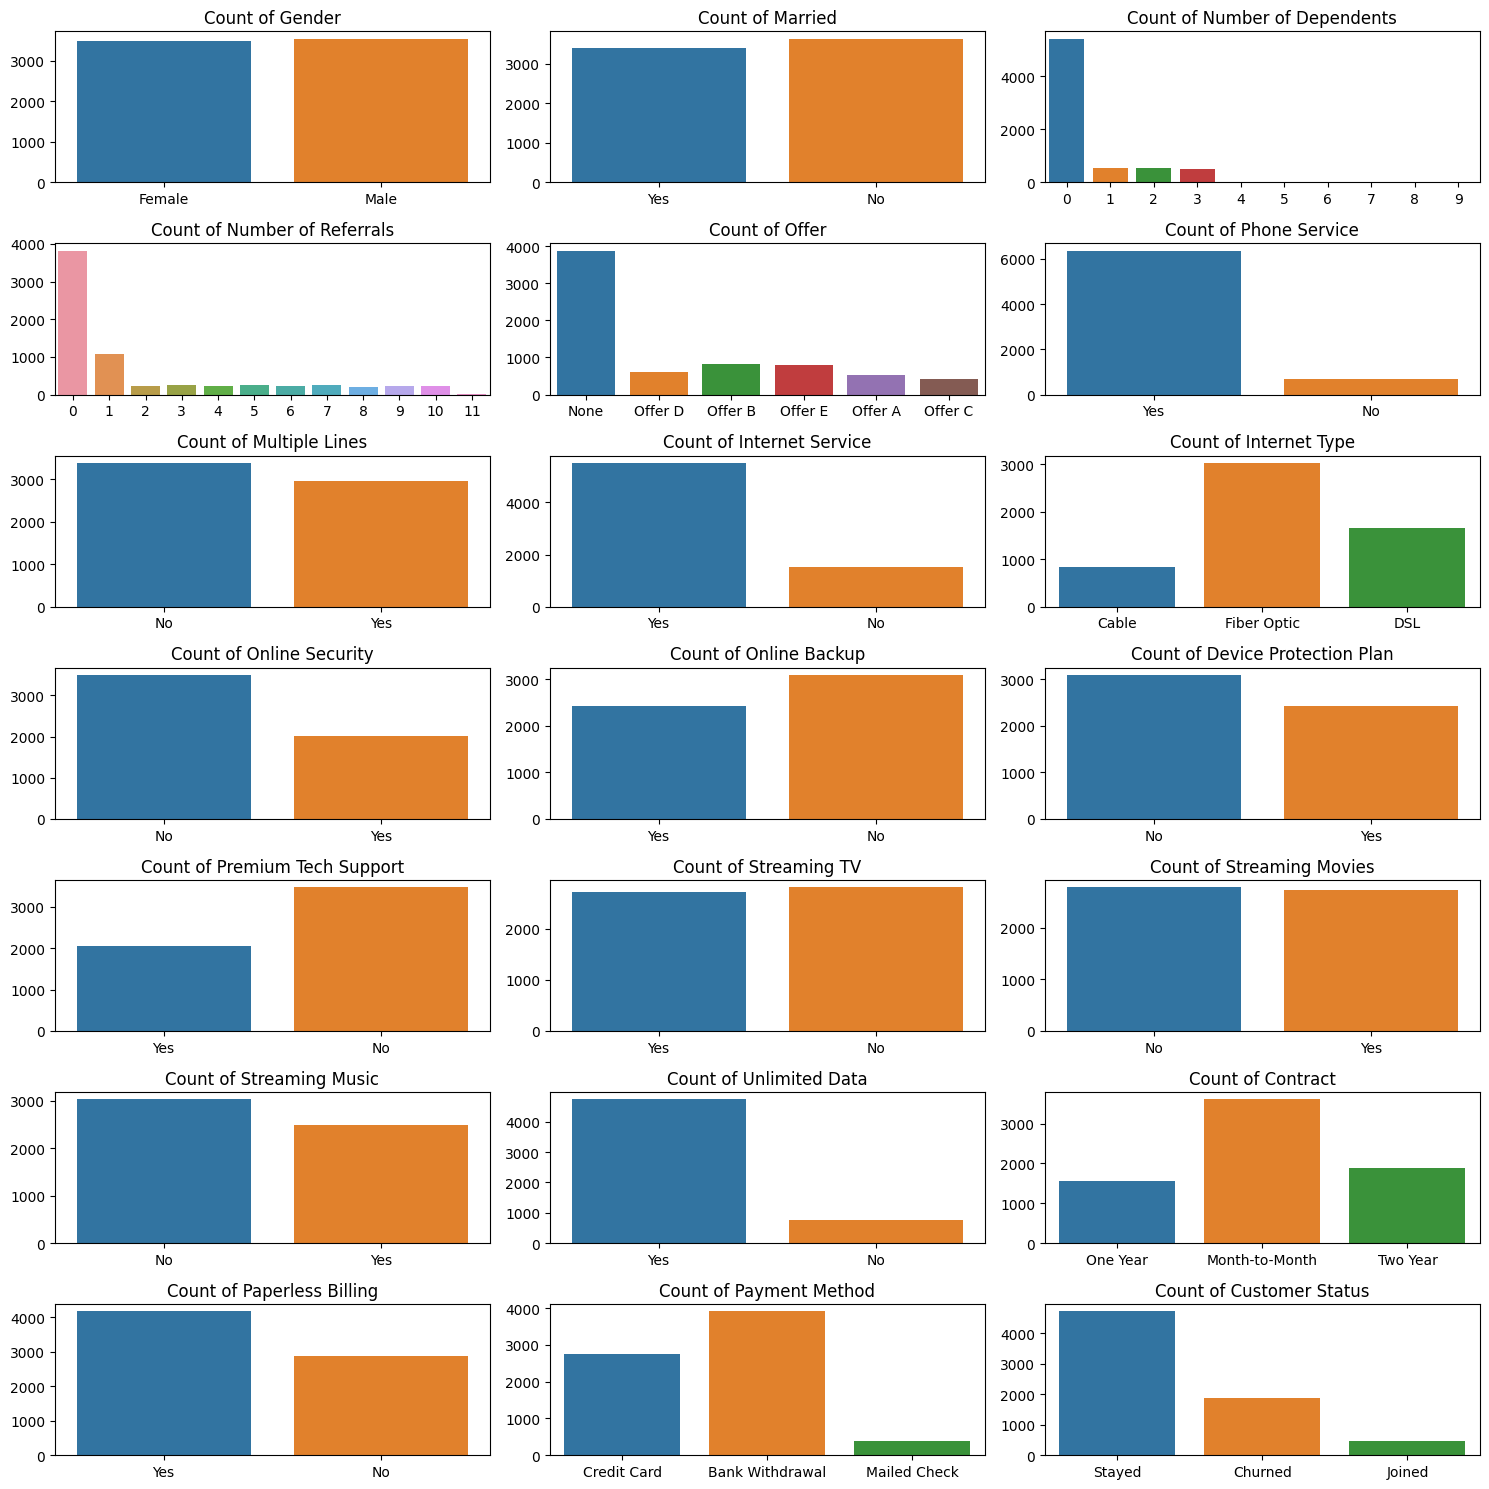

In [ ]:
exclude_column = ["City","Customer ID","Churn Category","Churn Reason","Zip Code"]
column_list = column_name_df[column_name_df["Variable Type"]=="Categorical"]["Column Name"].tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(7,3,figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.countplot(data=df,x=col,ax=ax)
  ax.set_title("Count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

In [ ]:
df["Churn Category"].value_counts().reset_index().sort_values(by="Churn Category",ascending=False)

index  Churn Category
0       Competitor             841
1  Dissatisfaction             321
2         Attitude             314
3            Price             211
4            Other             182

Text(0, 0.5, '')

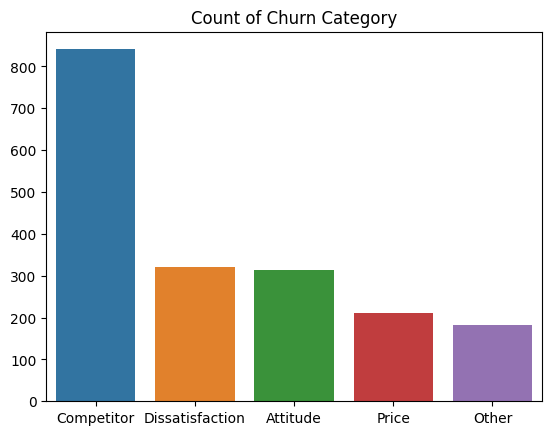

In [ ]:
df1=df["Churn Category"].value_counts().reset_index().sort_values(by="Churn Category",ascending=False)
sns.barplot(data=df1,x="index",y="Churn Category")
plt.title("Count of Churn Category")
plt.xlabel("")
plt.ylabel("")

In [ ]:
df1=df[["Churn Category","Churn Reason"]].value_counts().reset_index().sort_values(by=0,ascending=False).rename(columns={0:"Count"})
fig=px.bar(df1,
           x="Count",
           y="Churn Reason",
           color="Churn Category",
           template="simple_white",
           title="Count of Churn Reason")
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.show()

In [ ]:
df["City"].nunique()

1106

Text(0, 0.5, '')

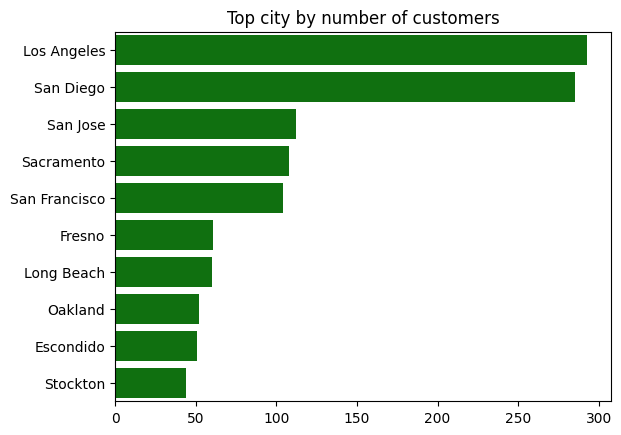

In [ ]:
df1=df["City"].value_counts().reset_index().rename(columns={"index":"City","City":"Count"}).sort_values(by="Count",ascending=False).head(10)
sns.barplot(data=df1,y="City",x="Count",color="green")
plt.title("Top city by number of customers")
plt.xlabel("")
plt.ylabel("")

In [ ]:
#Find out the most popular offer among Married customers and not married customers
df1=df.groupby("Married")["Offer"].value_counts().reset_index(name="Count")
fid=px.bar(df1,x="Married",y="Count",color="Offer",barmode="group",template="simple_white")
fid.show()

In [ ]:
#Which gender refers more customers
df1=df.groupby("Gender")["Number of Referrals"].value_counts().reset_index(name="Count")
fid=px.bar(df1,x="Number of Referrals",y="Count",color="Gender",barmode="group",template="simple_white")
fid.show()

Text(0, 0.5, '')

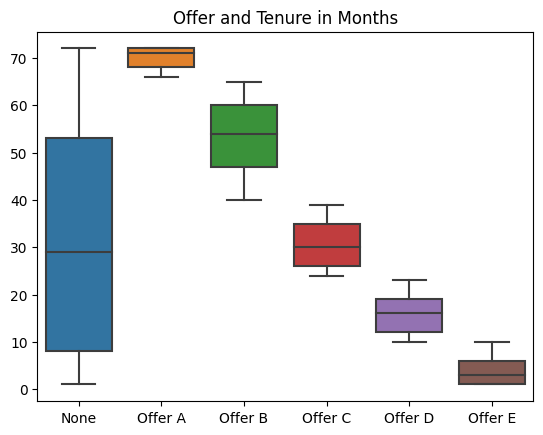

In [ ]:
#Tenure vs offer
sns.boxplot(data=df.sort_values(by="Offer",ascending=True),x="Offer",y="Tenure in Months")
plt.title("Offer and Tenure in Months")
plt.xlabel("")
plt.ylabel("")

In [ ]:
#Gender Vs Multiple Lines vs Dependents
df1=df.groupby("Gender")["Multiple Lines"].value_counts().reset_index(name="Count")
fig=px.bar(df1,x="Gender",y="Count",color="Multiple Lines",barmode="group",template="simple_white")
fig.show()

In [ ]:
#Gender Vs Multiple Lines vs Dependents
df1=df.groupby("Gender")["Number of Dependents"].value_counts().reset_index(name="Count")
df1["Number of Dependents"]=df1["Number of Dependents"].astype("category")
fig=px.bar(df1.sort_values(by="Number of Dependents",ascending=True),x="Gender",y="Count",color="Number of Dependents",barmode="group",template="simple_white")
fig.show()

In [ ]:
#Offer vs data - Which offer is offering unlimited data
df1=df.groupby("Offer")["Unlimited Data"].value_counts().reset_index(name="Count")
fig=px.bar(df1.sort_values(by="Offer",ascending=True),x="Offer",y="Count",color="Unlimited Data",barmode="group",template="simple_white")
fig.show()

Text(0, 0.5, '')

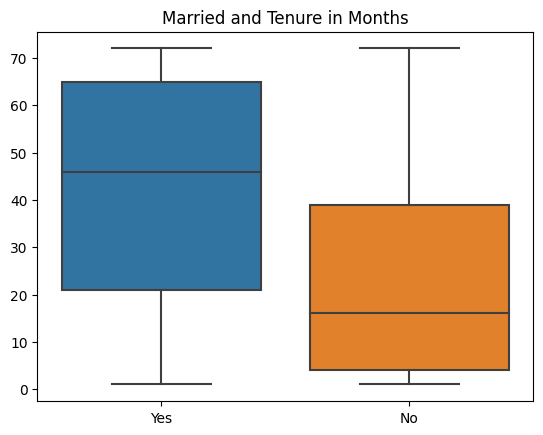

In [ ]:
#Married vs Tenure in Months
sns.boxplot(data=df, x="Married",y="Tenure in Months")
plt.title("Married and Tenure in Months")
plt.xlabel("")
plt.ylabel("")

In [ ]:
#Number of Dependents vs Tenure in Months
fig=px.box(df, x="Number of Dependents",y="Tenure in Months",template="simple_white",title="Number of Dependents and Tenure in Months")
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.show()

### Understand continuous variables

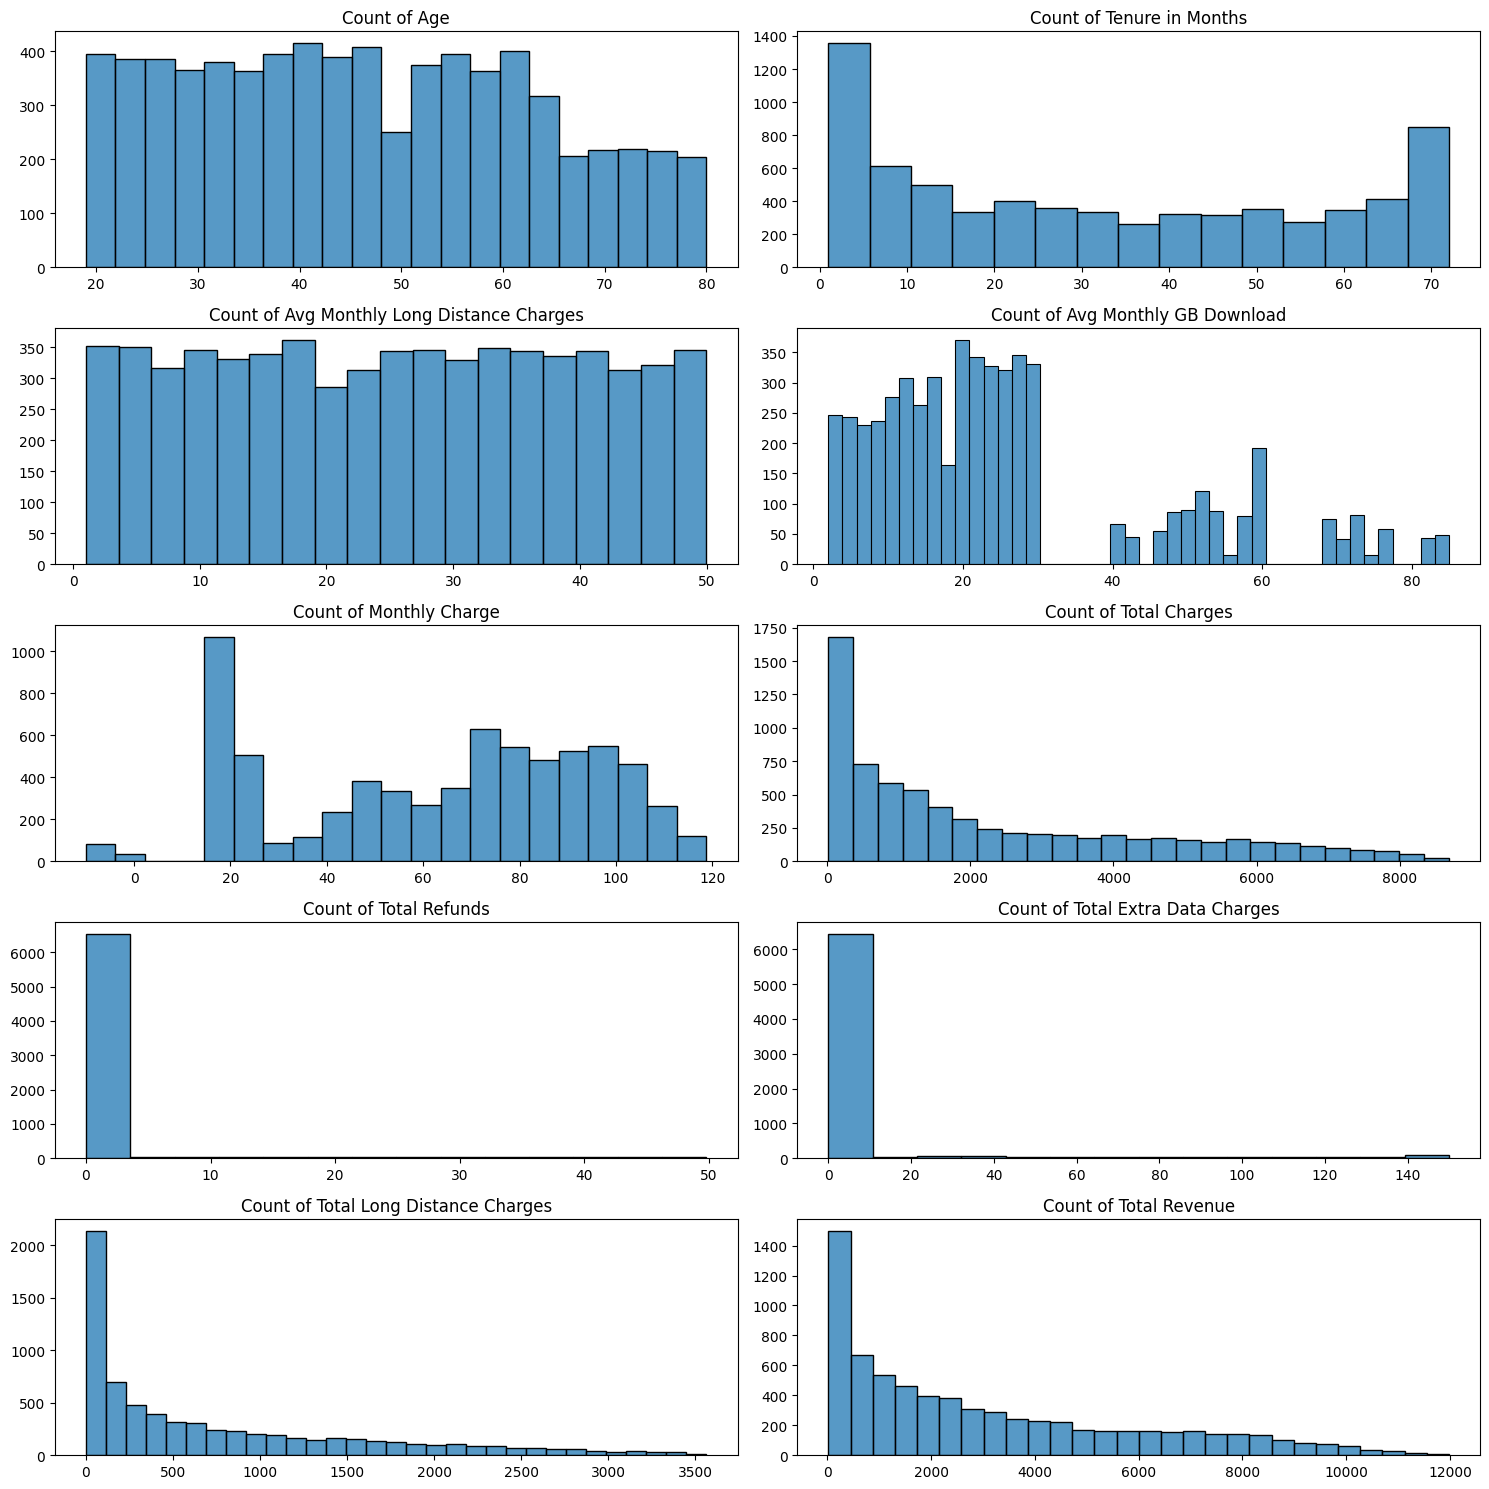

In [ ]:
exclude_column = ["Latitude","Longitude","Population"]
column_list = column_name_df[column_name_df["Variable Type"]=="Continuous"]["Column Name"].tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(5,2,figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.histplot(data=df,x=col,ax=ax)
  ax.set_title("Count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

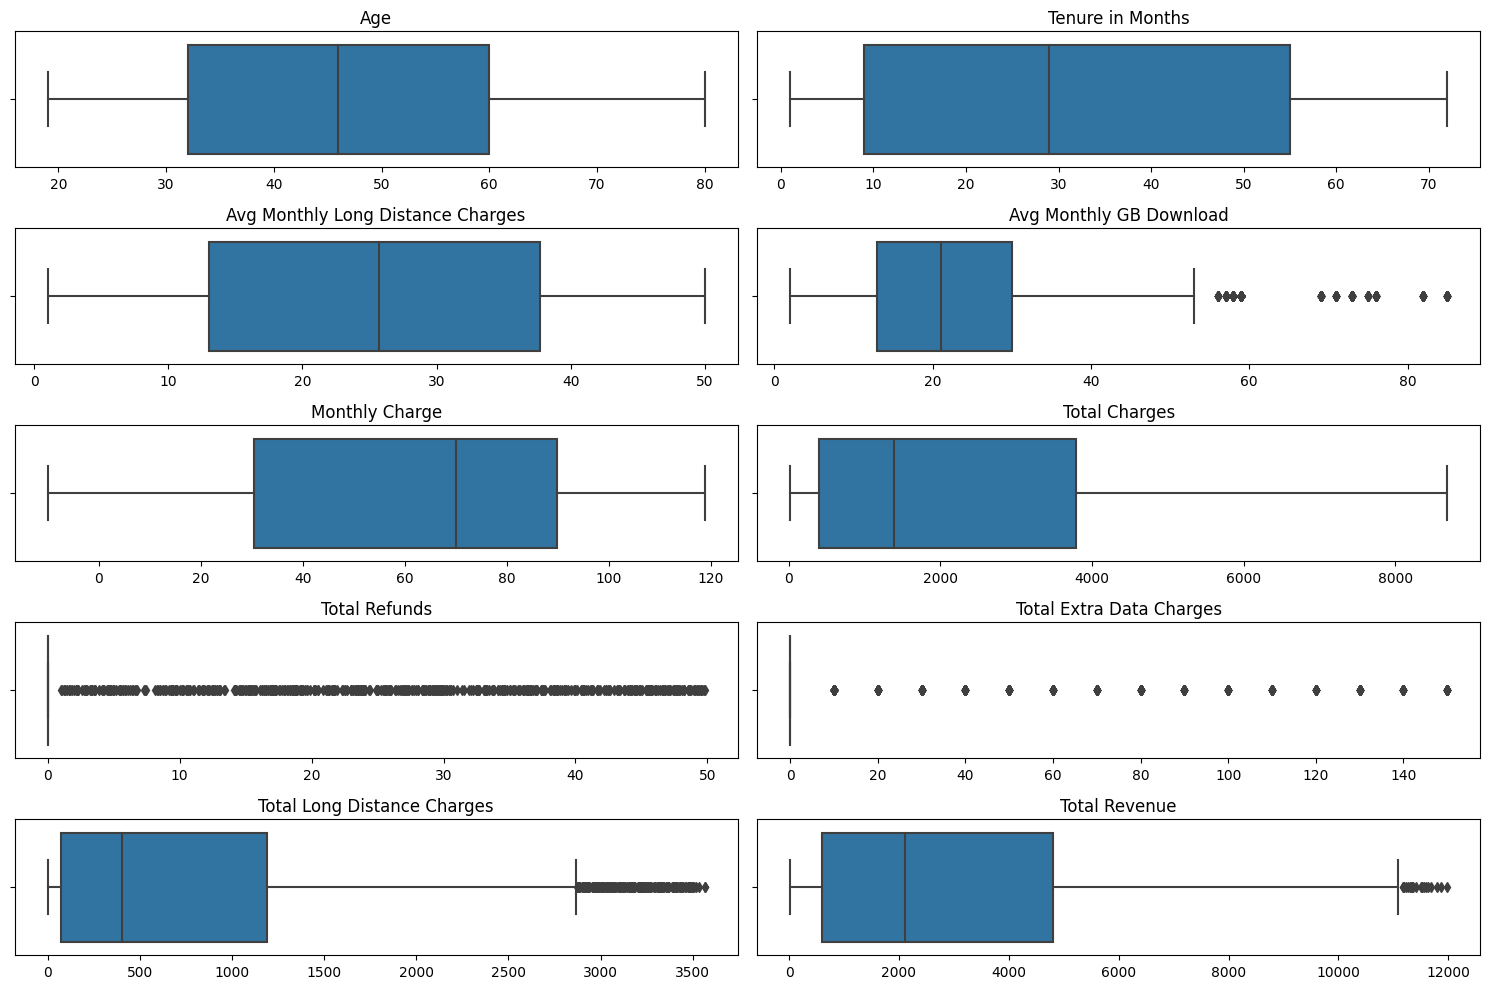

In [ ]:
exclude_column = ["Latitude","Longitude","Population"]
column_list = column_name_df[column_name_df["Variable Type"]=="Continuous"]["Column Name"].tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(5,2,figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.boxplot(data=df,x=col,ax=ax)
  ax.set_title(col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

In [ ]:
df[df["Monthly Charge"]<0]

Customer ID  Gender  Age Married  Number of Dependents  \
4     0003-MKNFE    Male   46      No                     0   
16    8815-LMFLX    Male   61     Yes                     4   
67    3800-LYTRK  Female   52      No                     0   
123   7137-NAXML    Male   63      No                     0   
129   0052-DCKON    Male   28     Yes                     0   
...          ...     ...  ...     ...                   ...   
6716  5028-GZLDO    Male   21      No                     0   
6808  9746-YKGXB    Male   48     Yes                     2   
6850  5574-NXZIU    Male   36      No                     0   
6894  5816-JMLGY  Female   28     Yes                     0   
6987  7995-ZHHNZ    Male   56     Yes                     0   

                     City  Zip Code   Latitude   Longitude  \
4                Glendale     91206  34.162515 -118.203869   
16               Martinez     94553  38.014457 -122.115432   
67    Point Reyes Station     94956  38.060264 -122.830646   
123            Moss Beach     94038  37.515556 -122.502311   
129           Los Angeles     90063  34.044271 -118.185237   
...                   ...       ...        ...         ...   
6716               Moraga     94556  37.827946 -122.107185   
6808           Sacramento     95838  38.646096 -121.442433   
6850           Los Alamos     93440  34.758699 -120.275839   
6894            Red Bluff     96080  40.186772 -122.388361   
6987            Fullerton     92832  33.868316 -117.929029   

      Number of Referrals  ...  Monthly Charge Total Charges Total Refunds  \
4                       0  ...            -4.0        542.40         38.33   
16                      8  ...            -8.0        546.85          0.00   
67                      0  ...            -8.0        795.15          0.00   
123                     0  ...            -9.0        405.60          0.00   
129                     9  ...            -2.0       7942.15          0.00   
...                   ...  ...             ...           ...           ...   
6716                    0  ...            -2.0        140.70          0.00   
6808                    9  ...            -3.0       2276.10         23.50   
6850                    0  ...           -10.0       7049.75          0.00   
6894                    4  ...            -4.0       5717.85          0.00   
6987                    1  ...            -7.0       2386.85         28.83   

      Total Extra Data Charges Total Long Distance Charges Total Revenue  \
4                           10                       96.21        610.28   
16                           0                      489.00       1035.85   
67                         100                      387.52       1282.67   
123                          0                      606.51       1012.11   
129                          0                     2888.82      10830.97   
...                        ...                         ...           ...   
6716                         0                       72.12        212.82   
6808                         0                        0.00       2252.60   
6850                         0                      827.82       7877.57   
6894                         0                     2784.60       8502.45   
6987                         0                      867.30       3225.32   

     Customer Status   Churn Category             Churn Reason Population  
4             Stayed              NaN                      NaN      31297  
16            Stayed              NaN                      NaN      46677  
67            Stayed              NaN                      NaN       1885  
123           Stayed              NaN                      NaN       3064  
129           Stayed              NaN                      NaN      55668  
...              ...              ...                      ...        ...  
6716         Churned  Dissatisfaction  Service dissatisfaction      16510  
6808          Stayed              NaN        

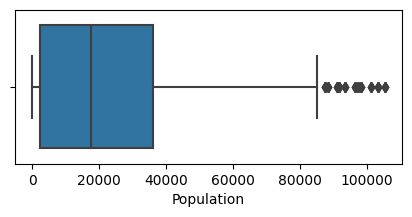

In [ ]:
plt.figure(figsize=(5, 2))
sns.boxplot(data=df,x="Population")
plt.show()

In [ ]:
fig = px.scatter_mapbox(df,
                        lat="Latitude",
                        lon="Longitude",
                        #color="Married",
                        #size="Population",
                        #color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=5,
                        mapbox_style="carto-positron",
                        title="Customer distribution by geography")

fig.update_layout(height=650)

fig.show()

In [ ]:
#What would be the relation between population and referrals
df["Number of Referrals"]=df["Number of Referrals"].astype("category")
fig=px.box(df,x="Number of Referrals",y="Population",template="simple_white")
fig.show()

### Relationship 1: Customer Status vs categorical variables

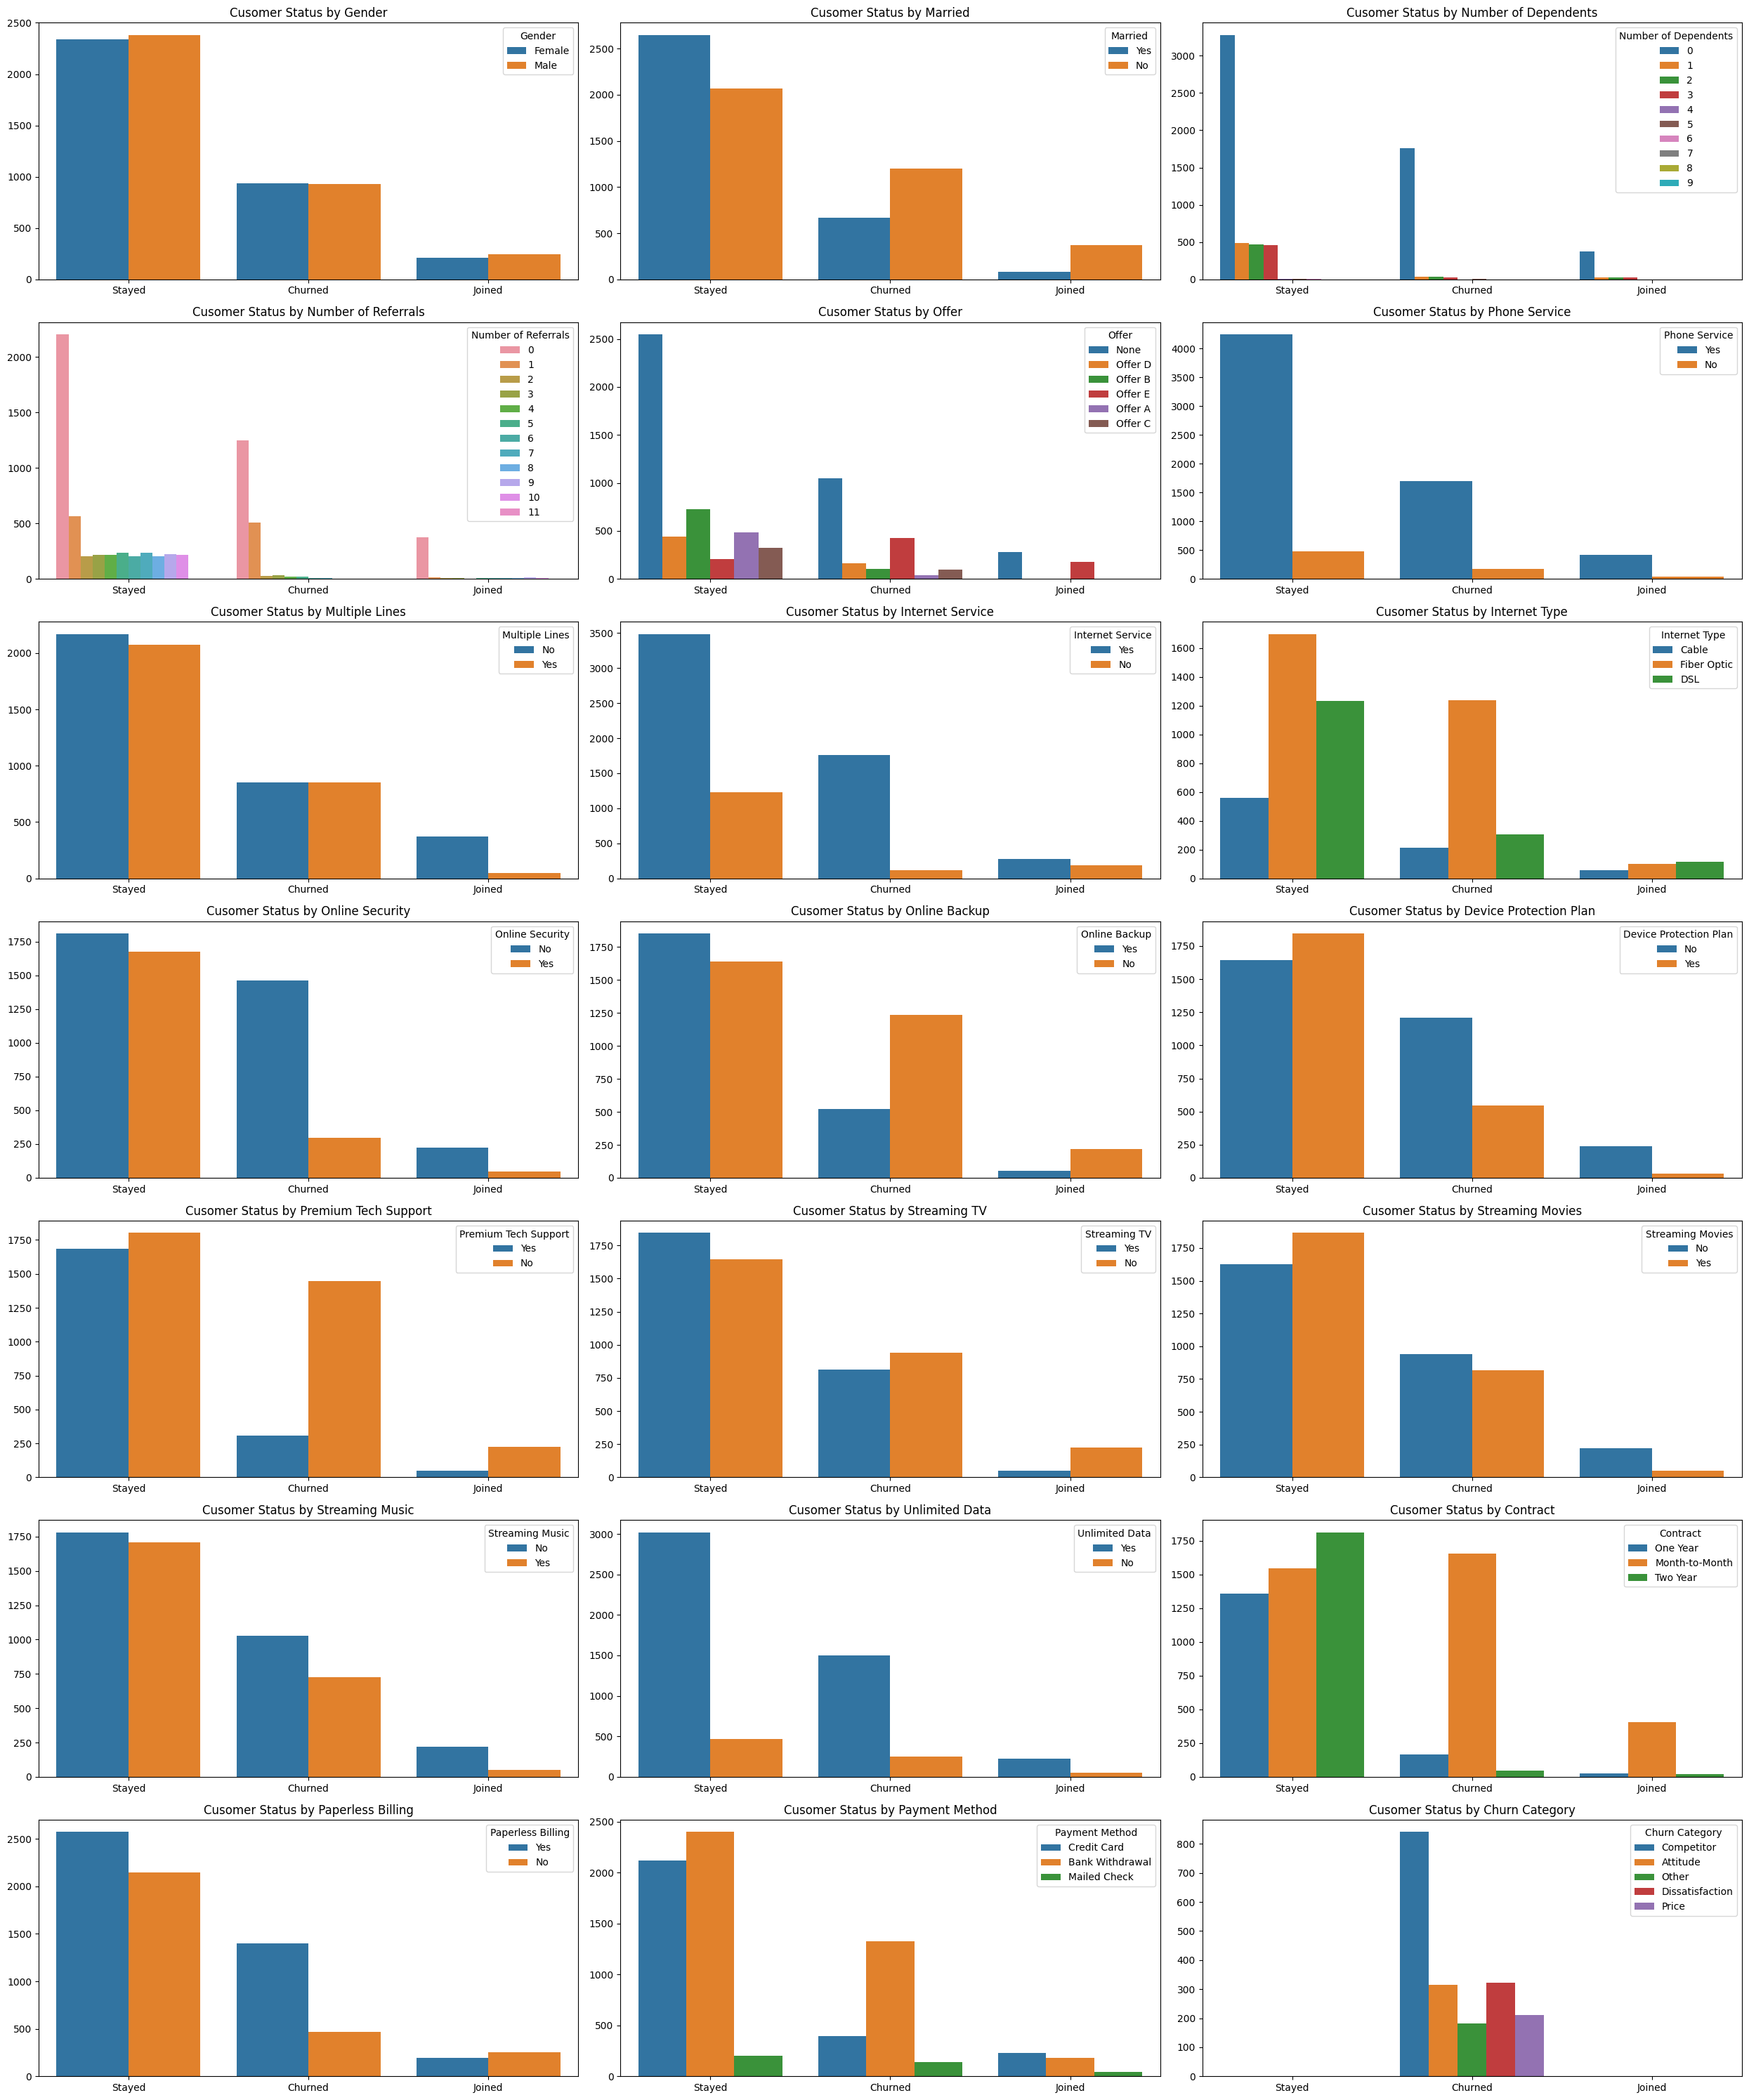

In [ ]:
exclude_column = ["City","Customer ID","Churn Reason","Zip Code","Customer Status"]
column_list = column_name_df[column_name_df["Variable Type"]=="Categorical"]["Column Name"].tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(7,3,figsize=(25,30))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.countplot(data=df,x="Customer Status",hue=col,ax=ax)
  ax.set_title("Cusomer Status by "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

### Relationship 2: Customer Status vs continuous variables



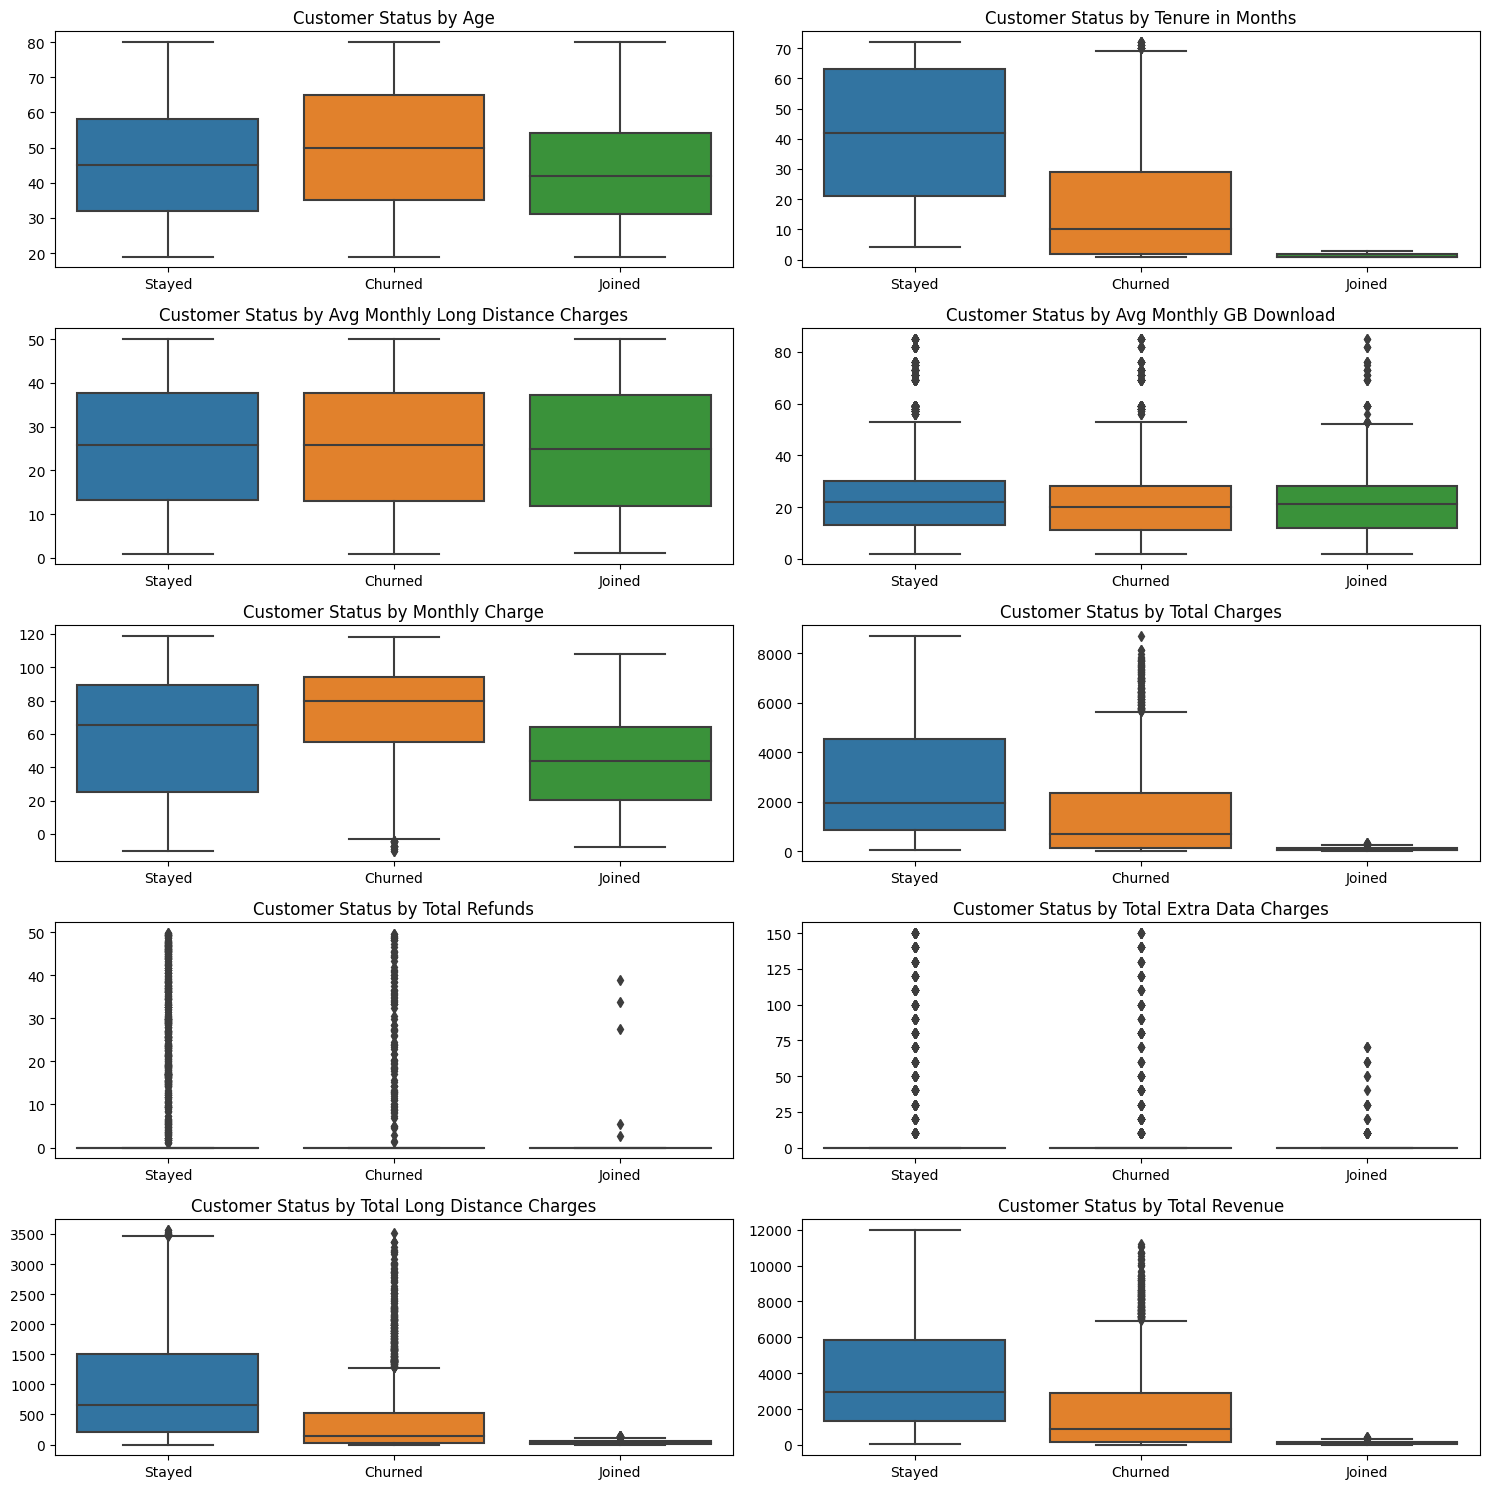

In [ ]:
exclude_column = ["Latitude","Longitude","Population"]
column_list = column_name_df[column_name_df["Variable Type"]=="Continuous"]["Column Name"].tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(5,2,figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.boxplot(data=df,x="Customer Status",y=col,ax=ax)
  ax.set_title("Customer Status by "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

In [ ]:
fig = px.scatter_mapbox(df,
                        lat="Latitude",
                        lon="Longitude",
                        color="Customer Status",
                        #size="Monthly Charge",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=5,
                        mapbox_style="carto-positron",
                        title="Customer distribution by geography")

fig.update_layout(height=650)

fig.show()

In [ ]:
fig=px.box(df,x="Customer Status",y="Tenure in Months",template="simple_white",title="Customer Status by Tenure in Months")
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.show()

In [ ]:
df[["Total Revenue","Monthly Charge"]].mean()

Total Revenue     3034.379056
Monthly Charge      63.596131
dtype: float64

In [ ]:
# There are outliers in the above chart, these are long term customers who left => need to investigate this group

customer_df=df[(df["Customer Status"]=="Churned")&(df["Tenure in Months"]>69)]
customer_df[["Total Revenue","Monthly Charge"]].mean()

#these customers have higher average Total Revenue and Monthly Charge than those of the population

Total Revenue     8470.146087
Monthly Charge      96.789130
dtype: float64

In [ ]:
customer_df["Customer ID"].nunique()

23

In [ ]:
customer_df["Churn Category"].value_counts()/len(customer_df["Churn Category"])

Competitor         0.391304
Dissatisfaction    0.217391
Price              0.217391
Attitude           0.173913
Name: Churn Category, dtype: float64

In [ ]:
customer_df["Churn Reason"].value_counts()

Competitor had better devices                4
Product dissatisfaction                      4
Attitude of service provider                 3
Competitor offered higher download speeds    2
Long distance charges                        2
Competitor offered more data                 2
Network reliability                          1
Competitor made better offer                 1
Extra data charges                           1
Price too high                               1
Attitude of support person                   1
Lack of affordable download/upload speed     1
Name: Churn Reason, dtype: int64

In [ ]:
#Age average between the customers who exited and those who stayed
df1=df.groupby("Customer Status")["Age"].mean().reset_index()
fig=px.bar(df1,x="Customer Status",y="Age",template="simple_white")
fig.show()

In [ ]:
#Age average between the customers who exited and who stayed by gender
df1=df.groupby(["Customer Status","Gender"])["Age"].mean().reset_index()
fig=px.bar(df1,x="Customer Status",y="Age",color="Gender",barmode="group",template="simple_white")
fig.show()

In [ ]:
#Population density between the customers who exited and who stayed
df1=df.groupby("Customer Status")["Population"].mean().reset_index()
fig=px.bar(df1,x="Customer Status",y="Population",template="simple_white")
fig.show()

In [ ]:
#Find the relation between population and customer status
fig=px.box(df,x="Customer Status",y="Population",template="simple_white")
fig.show()

### Relationship 3: Total Revenue & Monthly Charge vs categorical variables

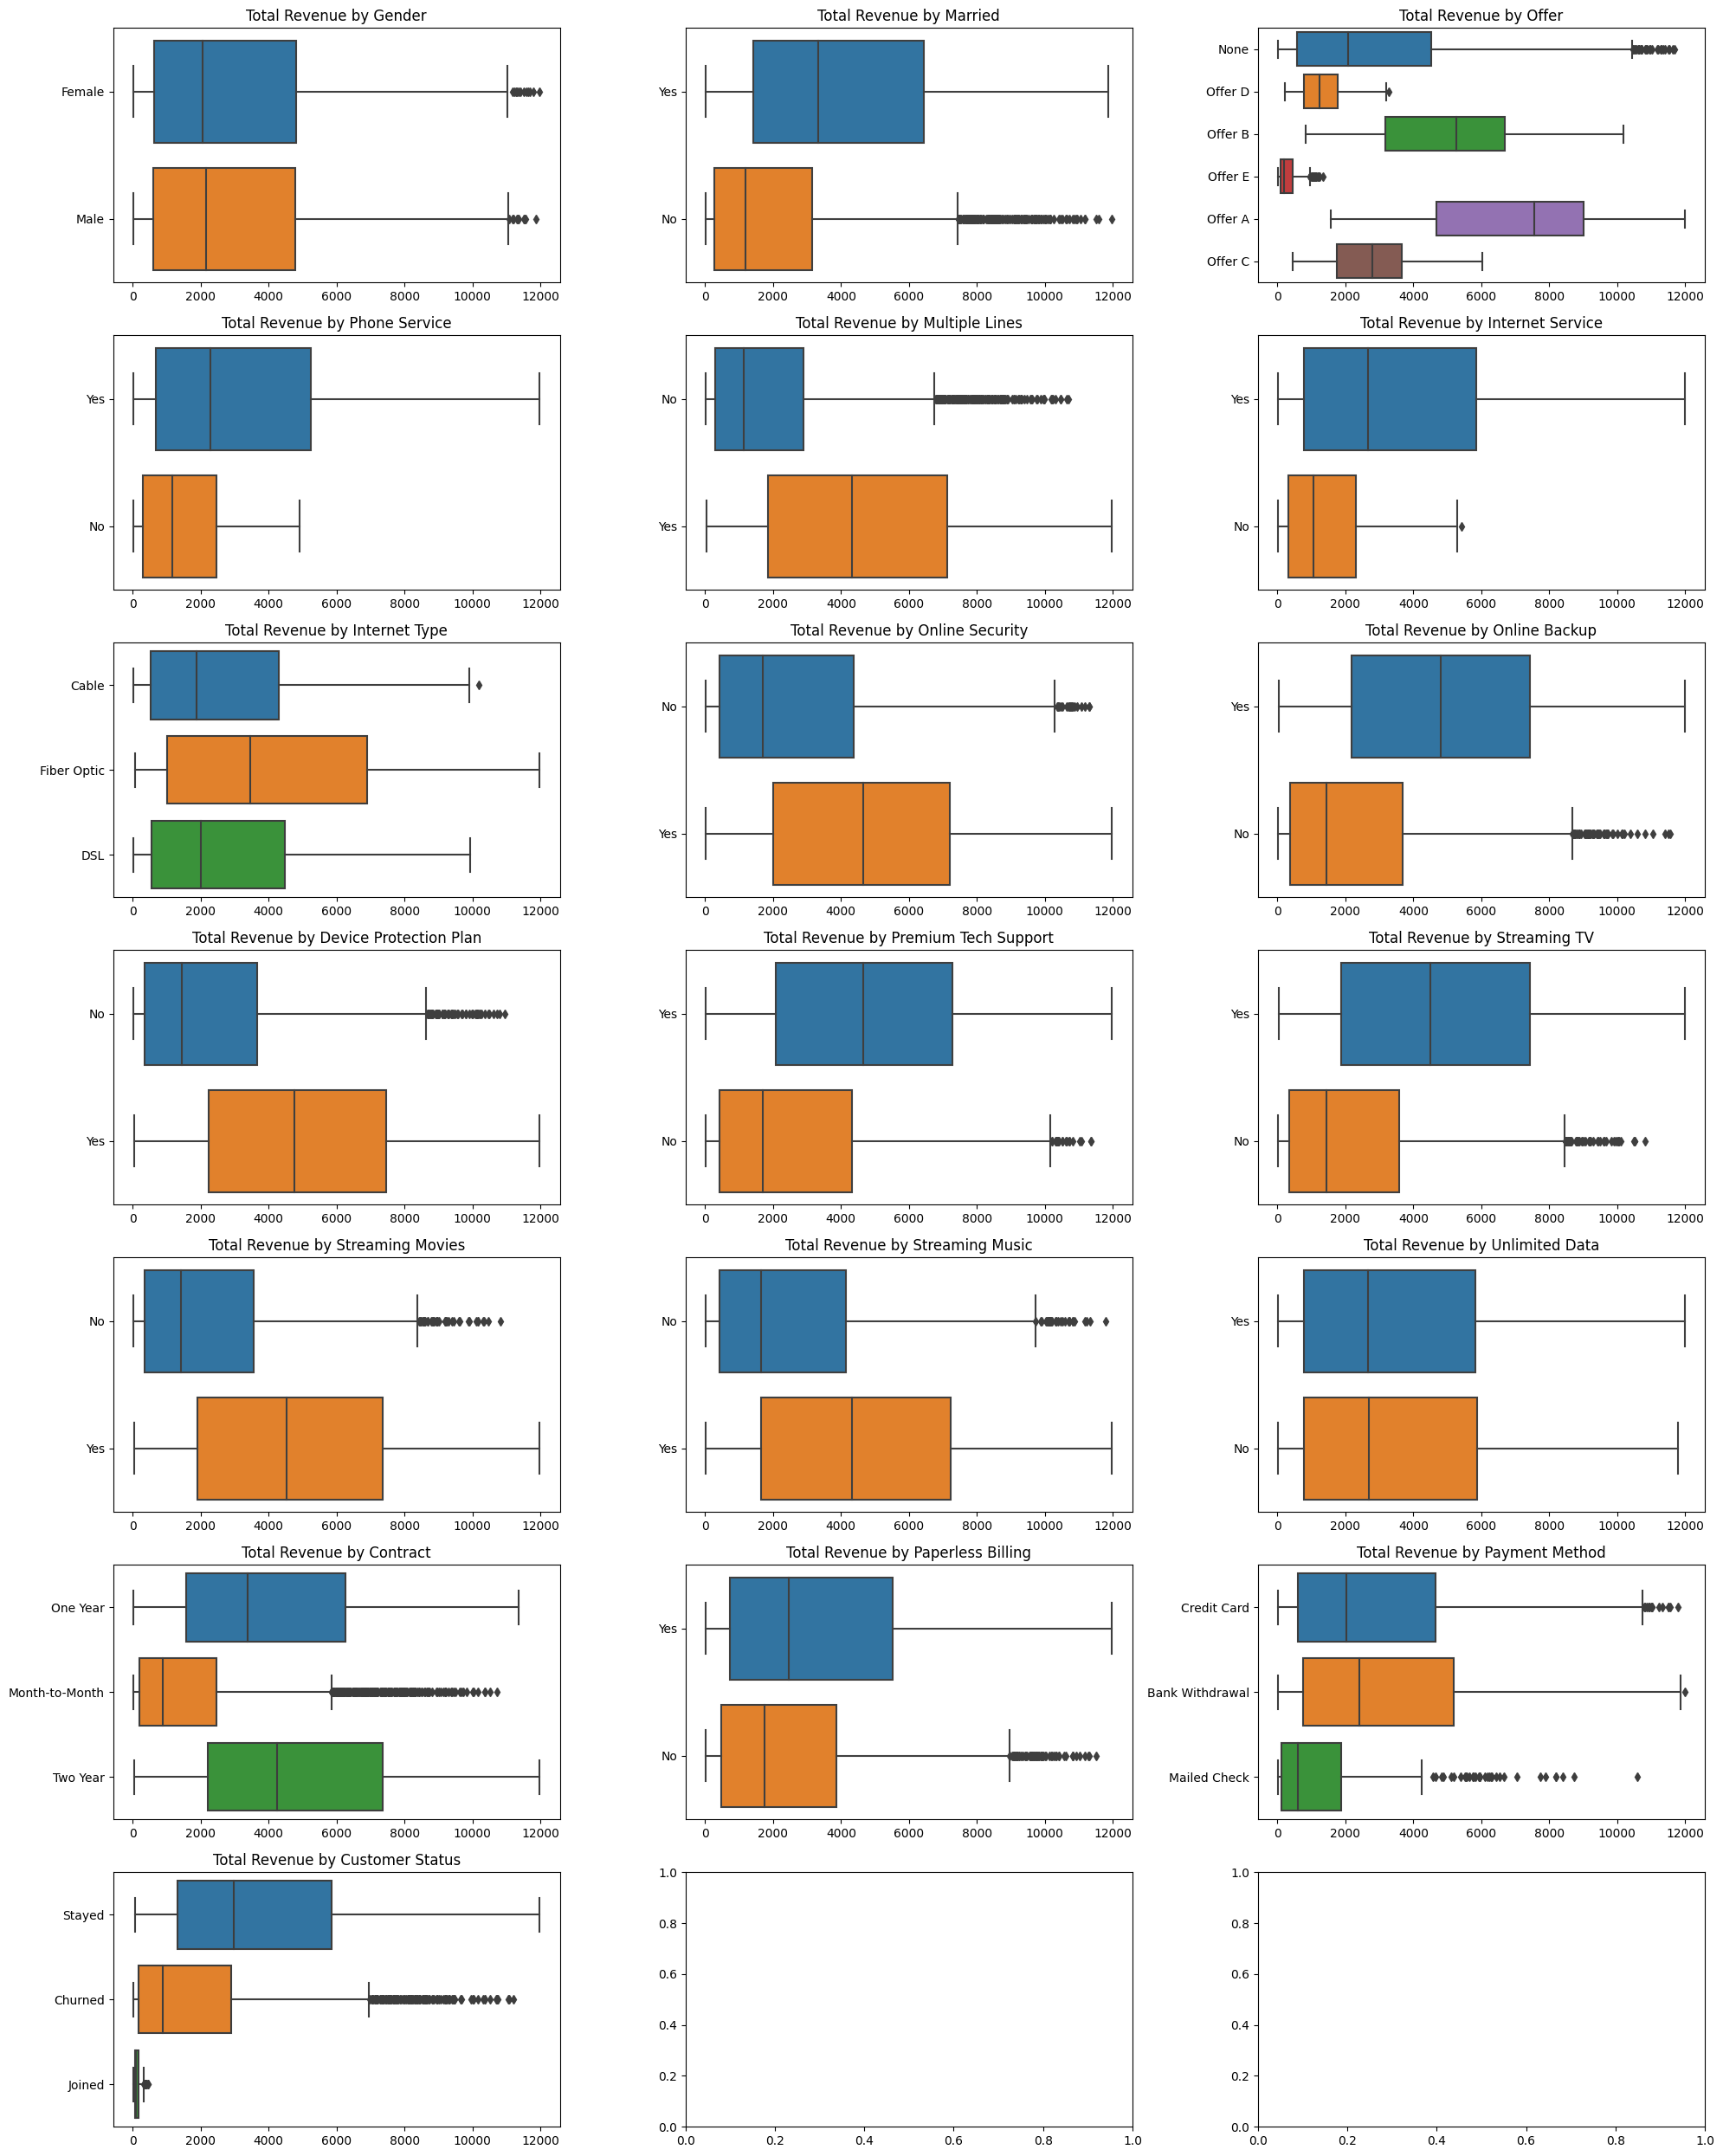

In [ ]:
exclude_column = ["City","Customer ID","Churn Category","Churn Reason","Zip Code","Number of Dependents","Number of Referrals"]
column_list = column_name_df[column_name_df["Variable Type"]=="Categorical"]["Column Name"].tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(7,3,figsize=(20,25))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.boxplot(data=df,x="Total Revenue",y=col,ax=ax)
  ax.set_title("Total Revenue by "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

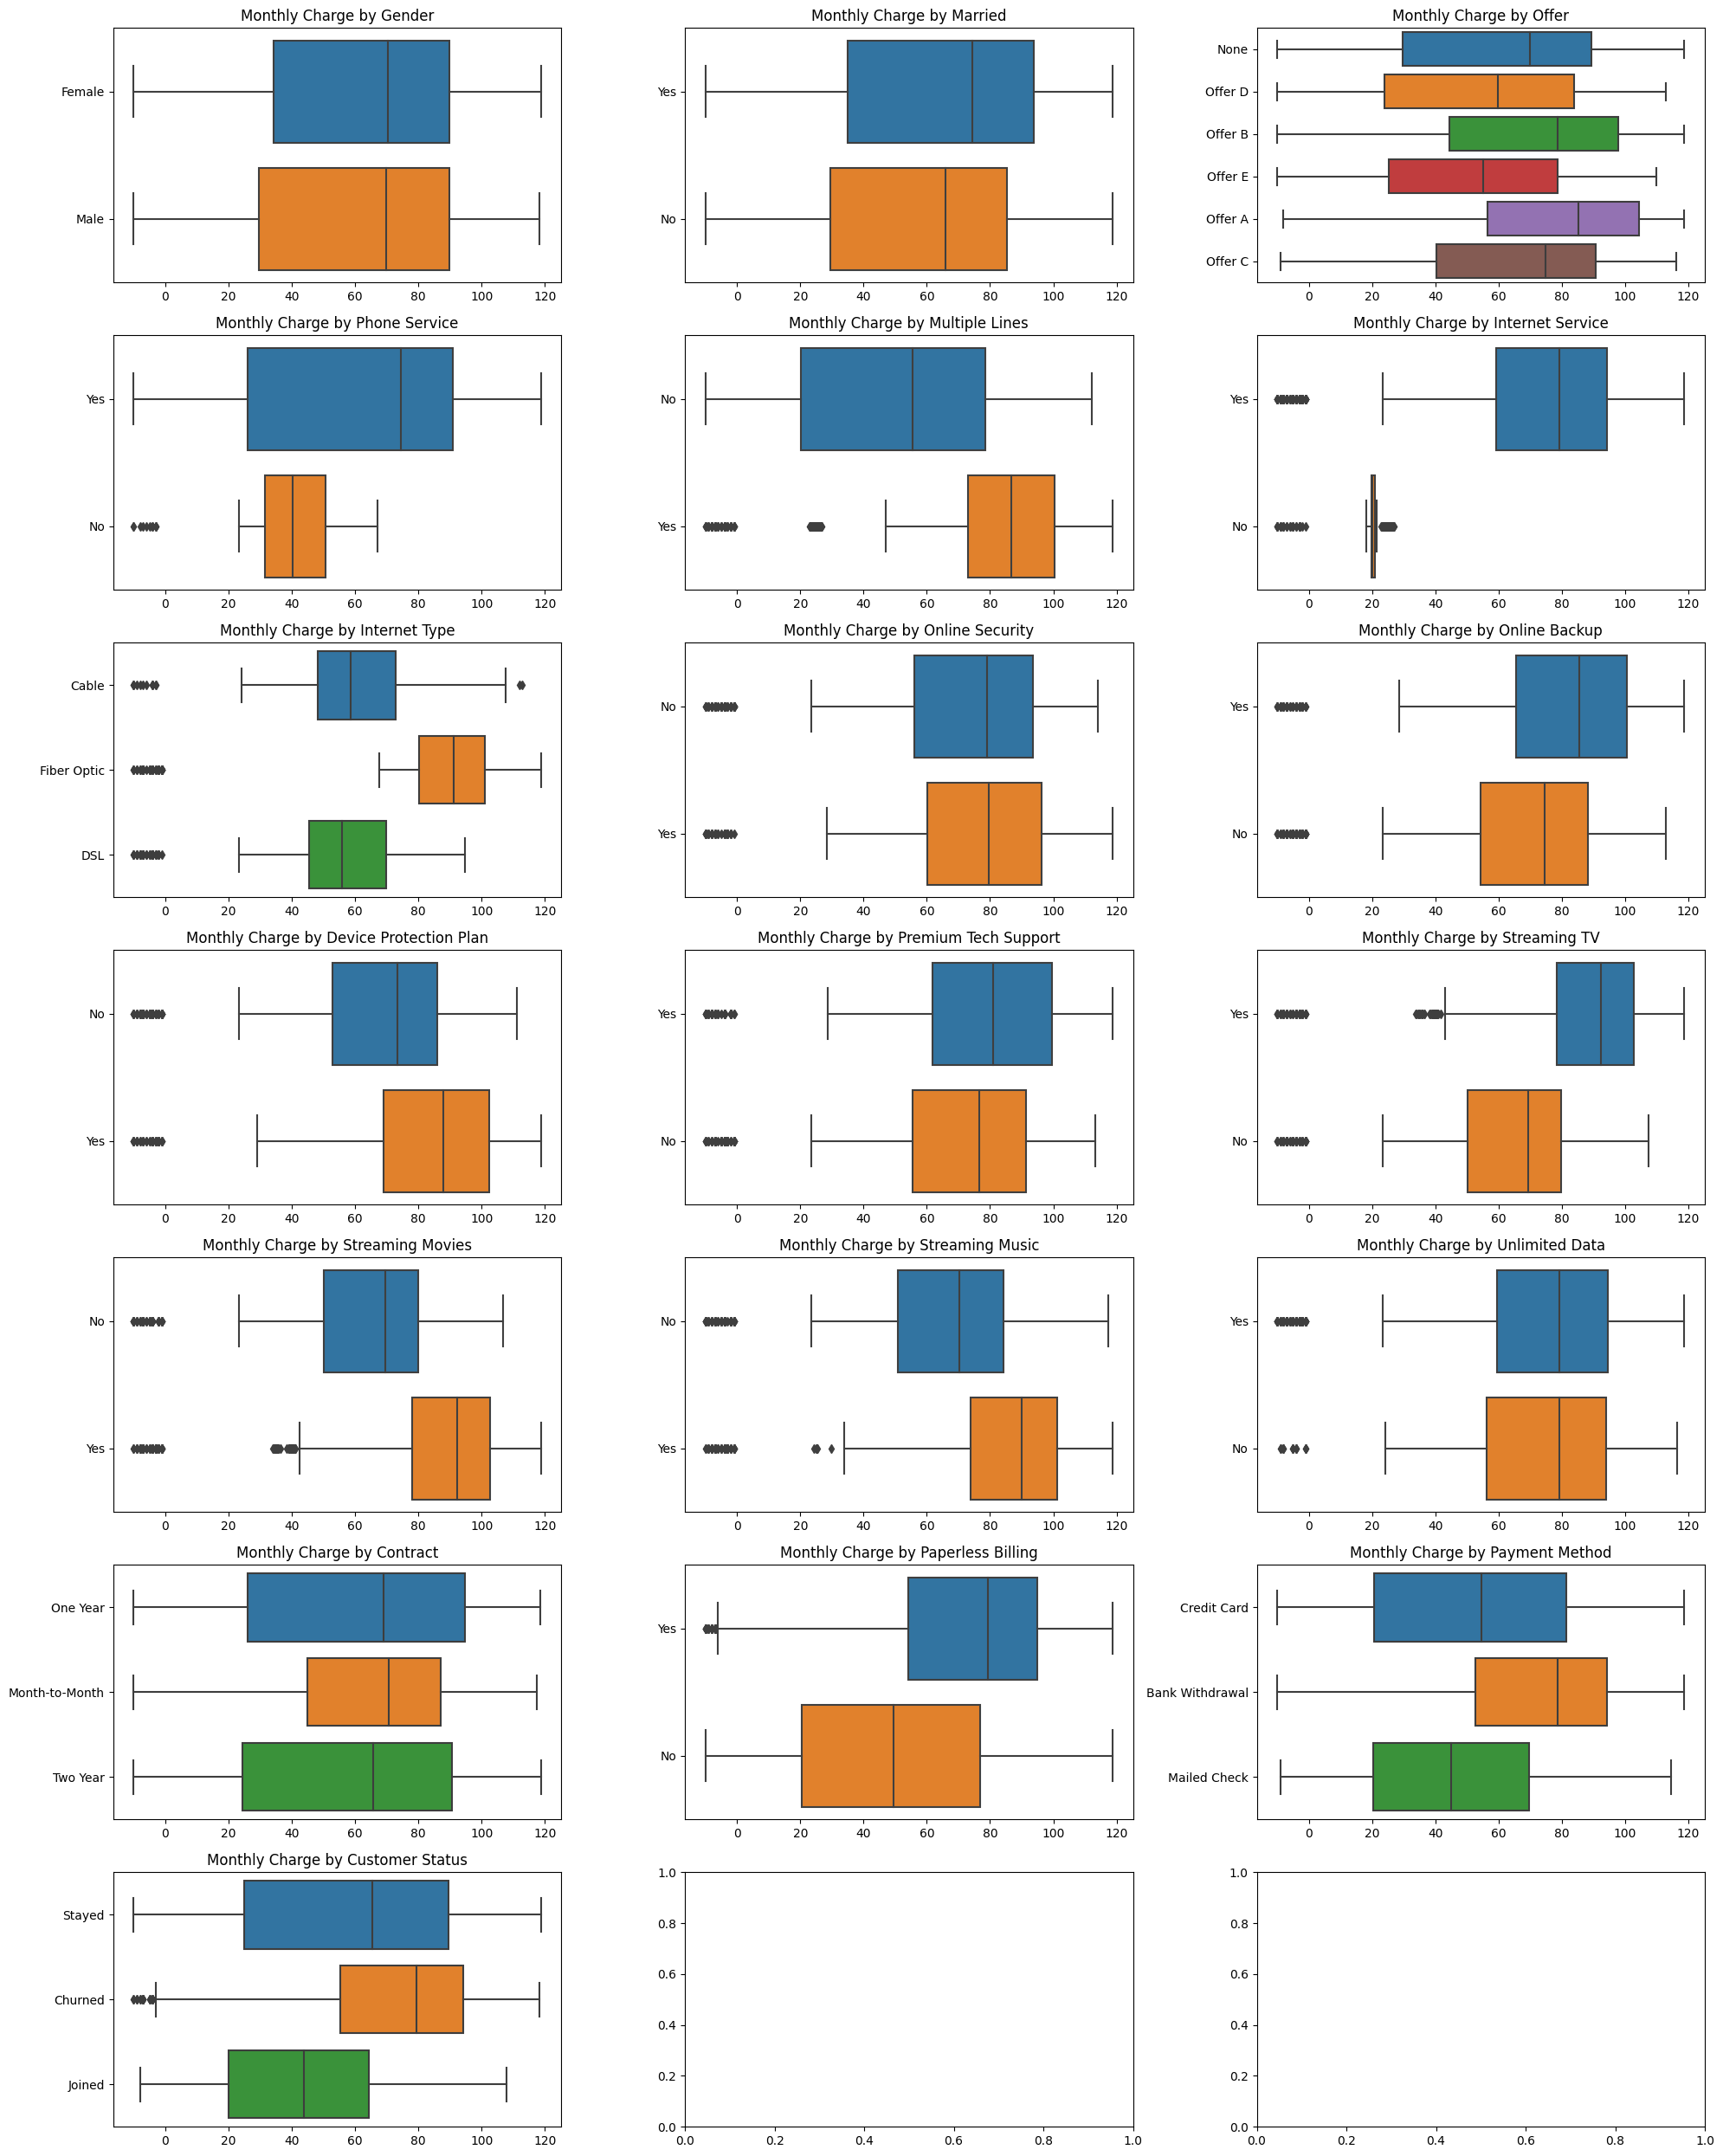

In [ ]:
exclude_column = ["City","Customer ID","Churn Category","Churn Reason","Zip Code","Number of Dependents","Number of Referrals"]
column_list = column_name_df[column_name_df["Variable Type"]=="Categorical"]["Column Name"].tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(7,3,figsize=(20,25))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.boxplot(data=df,x="Monthly Charge",y=col,ax=ax)
  ax.set_title("Monthly Charge by "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

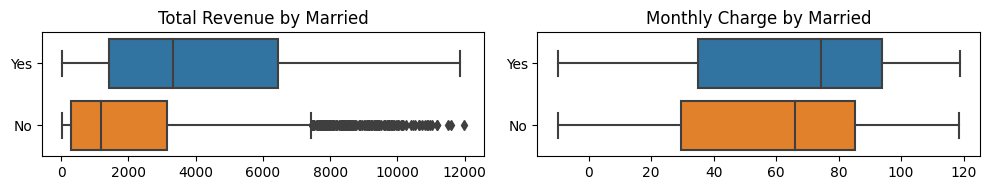

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,2))
axes = axes.flatten()

for i, col in enumerate(["Total Revenue","Monthly Charge"]):
  ax=axes[i]
  sns.boxplot(data=df,x=col,y="Married",ax=ax)
  ax.set_title(col+" by Married")
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

#Married people tend to be long-term customers more than month-to-motnh customers

In [ ]:
df[df["Married"]=="Yes"]["Tenure in Months"].mean()

42.04409171075838

In [ ]:
df[df["Married"]=="No"]["Tenure in Months"].mean()

23.363361713814886

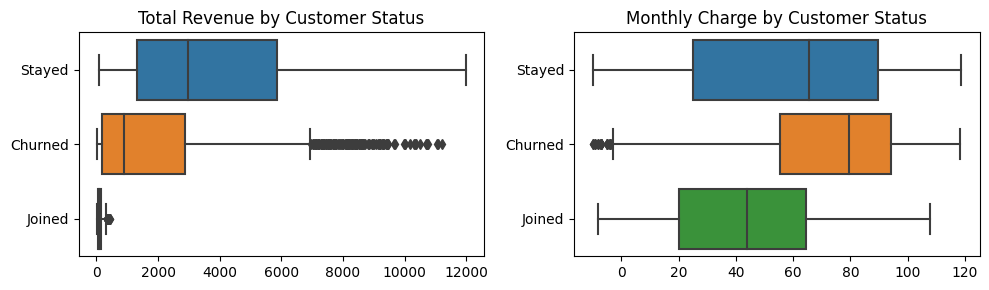

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,3))
axes = axes.flatten()

for i, col in enumerate(["Total Revenue","Monthly Charge"]):
  ax=axes[i]
  sns.boxplot(data=df,x=col,y="Customer Status",ax=ax)
  ax.set_title(col+" by Customer Status")
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

#Those who churned brought less total revenue but had high monthly charge => good impact in short-term
#Churned customers including some high-value customers => need to investigate this group

In [ ]:
df[["Total Revenue","Monthly Charge"]].mean()

Total Revenue     3034.379056
Monthly Charge      63.596131
dtype: float64

In [ ]:
customer_df=df[(df["Customer Status"]=="Churned")&(df["Total Revenue"]>=7000)]
customer_df[["Total Revenue","Monthly Charge"]].mean()

Total Revenue     8403.097519
Monthly Charge     102.061240
dtype: float64

In [ ]:
customer_df["Customer ID"].nunique()

129

In [ ]:
customer_df["Churn Category"].value_counts()/len(customer_df["Churn Category"])

Competitor         0.519380
Attitude           0.162791
Dissatisfaction    0.147287
Price              0.108527
Other              0.062016
Name: Churn Category, dtype: float64

In [ ]:
customer_df.describe()
#Number of Dependents = 0 => Most are single
#All are longterm customer >= 4 years
#High average monthly charge and total revenue compared to population
#Most have refer 0 or 1 time

Age  Number of Dependents      Zip Code    Latitude   Longitude  \
count  129.000000            129.000000    129.000000  129.000000  129.000000   
mean    49.682171              0.015504  93554.736434   36.164400 -119.769653   
std     17.699746              0.124027   1780.937163    2.623906    2.208806   
min     20.000000              0.000000  90015.000000   32.686740 -124.163234   
25%     34.000000              0.000000  92122.000000   33.888323 -121.837210   
50%     50.000000              0.000000  93513.000000   35.939068 -119.505661   
75%     66.000000              0.000000  95369.000000   38.265899 -117.821841   
max     80.000000              1.000000  96148.000000   41.950683 -115.191857   

       Tenure in Months  Avg Monthly Long Distance Charges  \
count        129.000000                         129.000000   
mean          62.348837                          32.894264   
std            6.644607                          13.330636   
min           48.000000                           1.930000   
25%           57.000000                          23.670000   
50%           65.000000                          34.390000   
75%           68.000000                          44.330000   
max           72.000000                          49.980000   

       Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
count               129.000000      129.000000     129.000000     129.000000   
mean                 24.186047      102.061240    6370.550000       1.107209   
std                  19.113055        9.195395     897.367812       5.270657   
min                   2.000000       65.300000    4759.750000       0.000000   
25%                  11.000000       99.150000    5638.300000       0.000000   
50%                  21.000000      104.150000    6341.450000       0.000000   
75%                  28.000000      107.500000    7007.600000       0.000000   
max                  85.000000      118.350000    8684.800000      48.540000   

       Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
count                129.000000                   129.000000     129.000000   
mean                  15.813953                  2017.840775    8403.097519   
std                   39.502723                   804.751455    1044.033424   
min                    0.000000                   121.590000    7015.270000   
25%                    0.000000                  1518.220000    7529.080000   
50%                    0.000000                  2071.300000    8214.620000   
75%                    0.000000                  2605.900000    9019.180000   
max                  150.000000                  3508.820000   11195.440000   

         Population  
count    129.000000  
mean   22081.550388  
std    20889.428956  
min      200.000000  
25%     1852.000000  
50%    15921.000000  
75%    34902.000000  
max    77683.000000

In [ ]:
customer_df["Offer"].value_counts()

None       70
Offer A    33
Offer B    26
Name: Offer, dtype: int64

In [ ]:
#Top customer by Revenue
df1=df.sort_values(by="Total Revenue",ascending=False).head(100)

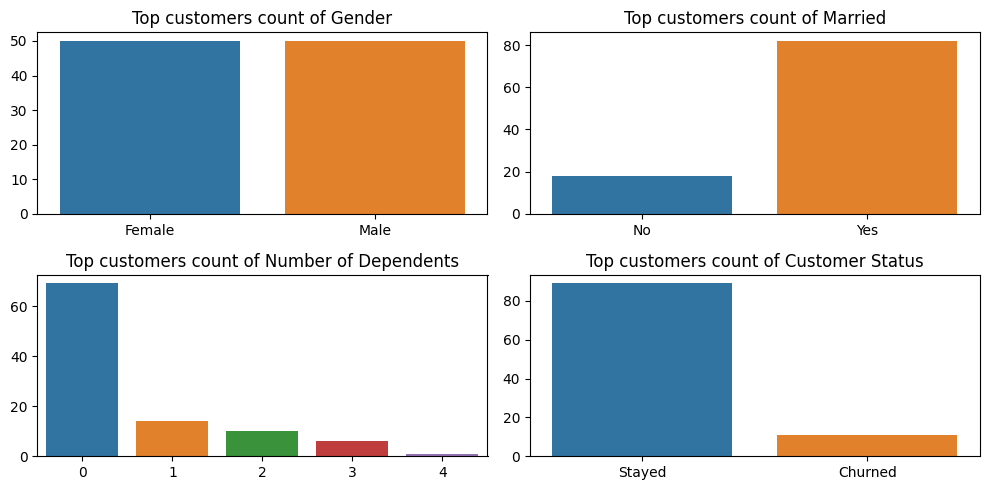

In [ ]:
#Top customer by Revenue
cols = ["Gender","Married","Number of Dependents","Customer Status"]

fig,axes=plt.subplots(2,2,figsize=(10,5))
axes = axes.flatten()

for i, col in enumerate(cols):
  ax=axes[i]
  sns.countplot(data=df1,x=col,ax=ax)
  ax.set_title("Top customers count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

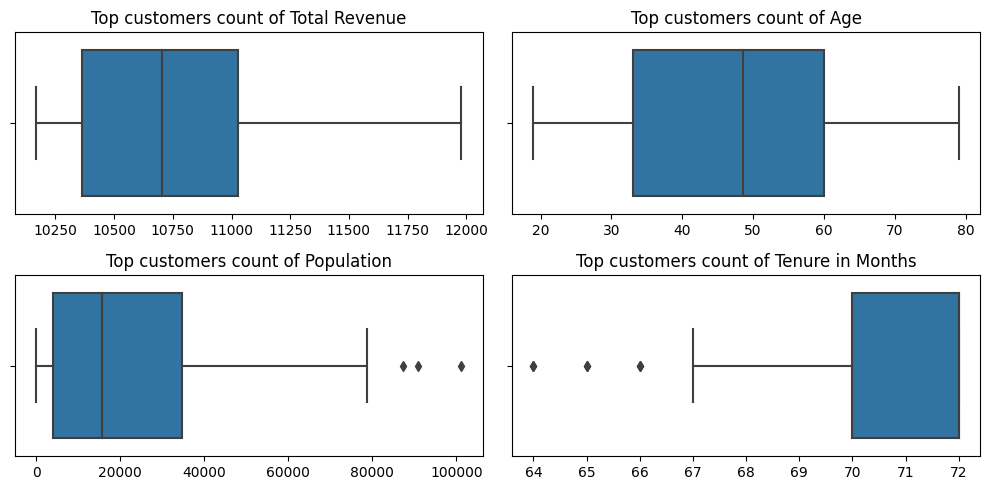

In [ ]:
#Top customer by Revenue
cols = ["Total Revenue","Age","Population","Tenure in Months"]

fig,axes=plt.subplots(2,2,figsize=(10,5))
axes = axes.flatten()

for i, col in enumerate(cols):
  ax=axes[i]
  sns.boxplot(data=df1,x=col,ax=ax)
  ax.set_title("Top customers count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

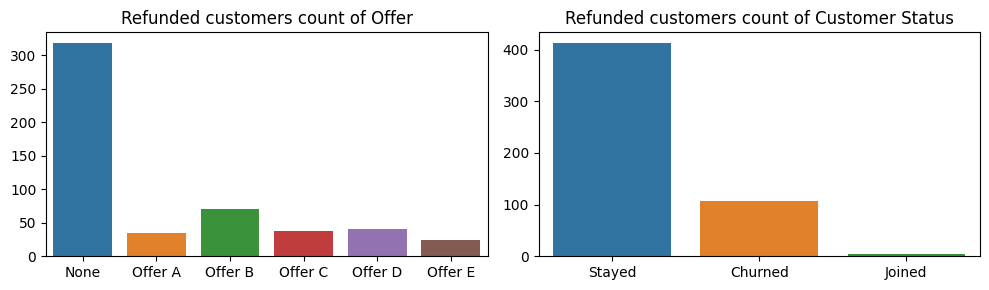

In [ ]:
#What is the popular offer and customer status among the customers who received refunds?
df1=df[df["Total Refunds"]!=0]
cols = ["Offer","Customer Status"]

fig,axes=plt.subplots(1,2,figsize=(10,3))
axes = axes.flatten()

for i, col in enumerate(cols):
  ax=axes[i]
  sns.countplot(data=df1.sort_values(by="Offer",ascending=True),x=col,ax=ax)
  ax.set_title("Refunded customers count of "+col)
  ax.set_xlabel("")
  ax.set_ylabel("")
plt.tight_layout()

### Relationship 4: Total Revnue & Monthly Charge vs continuous variables

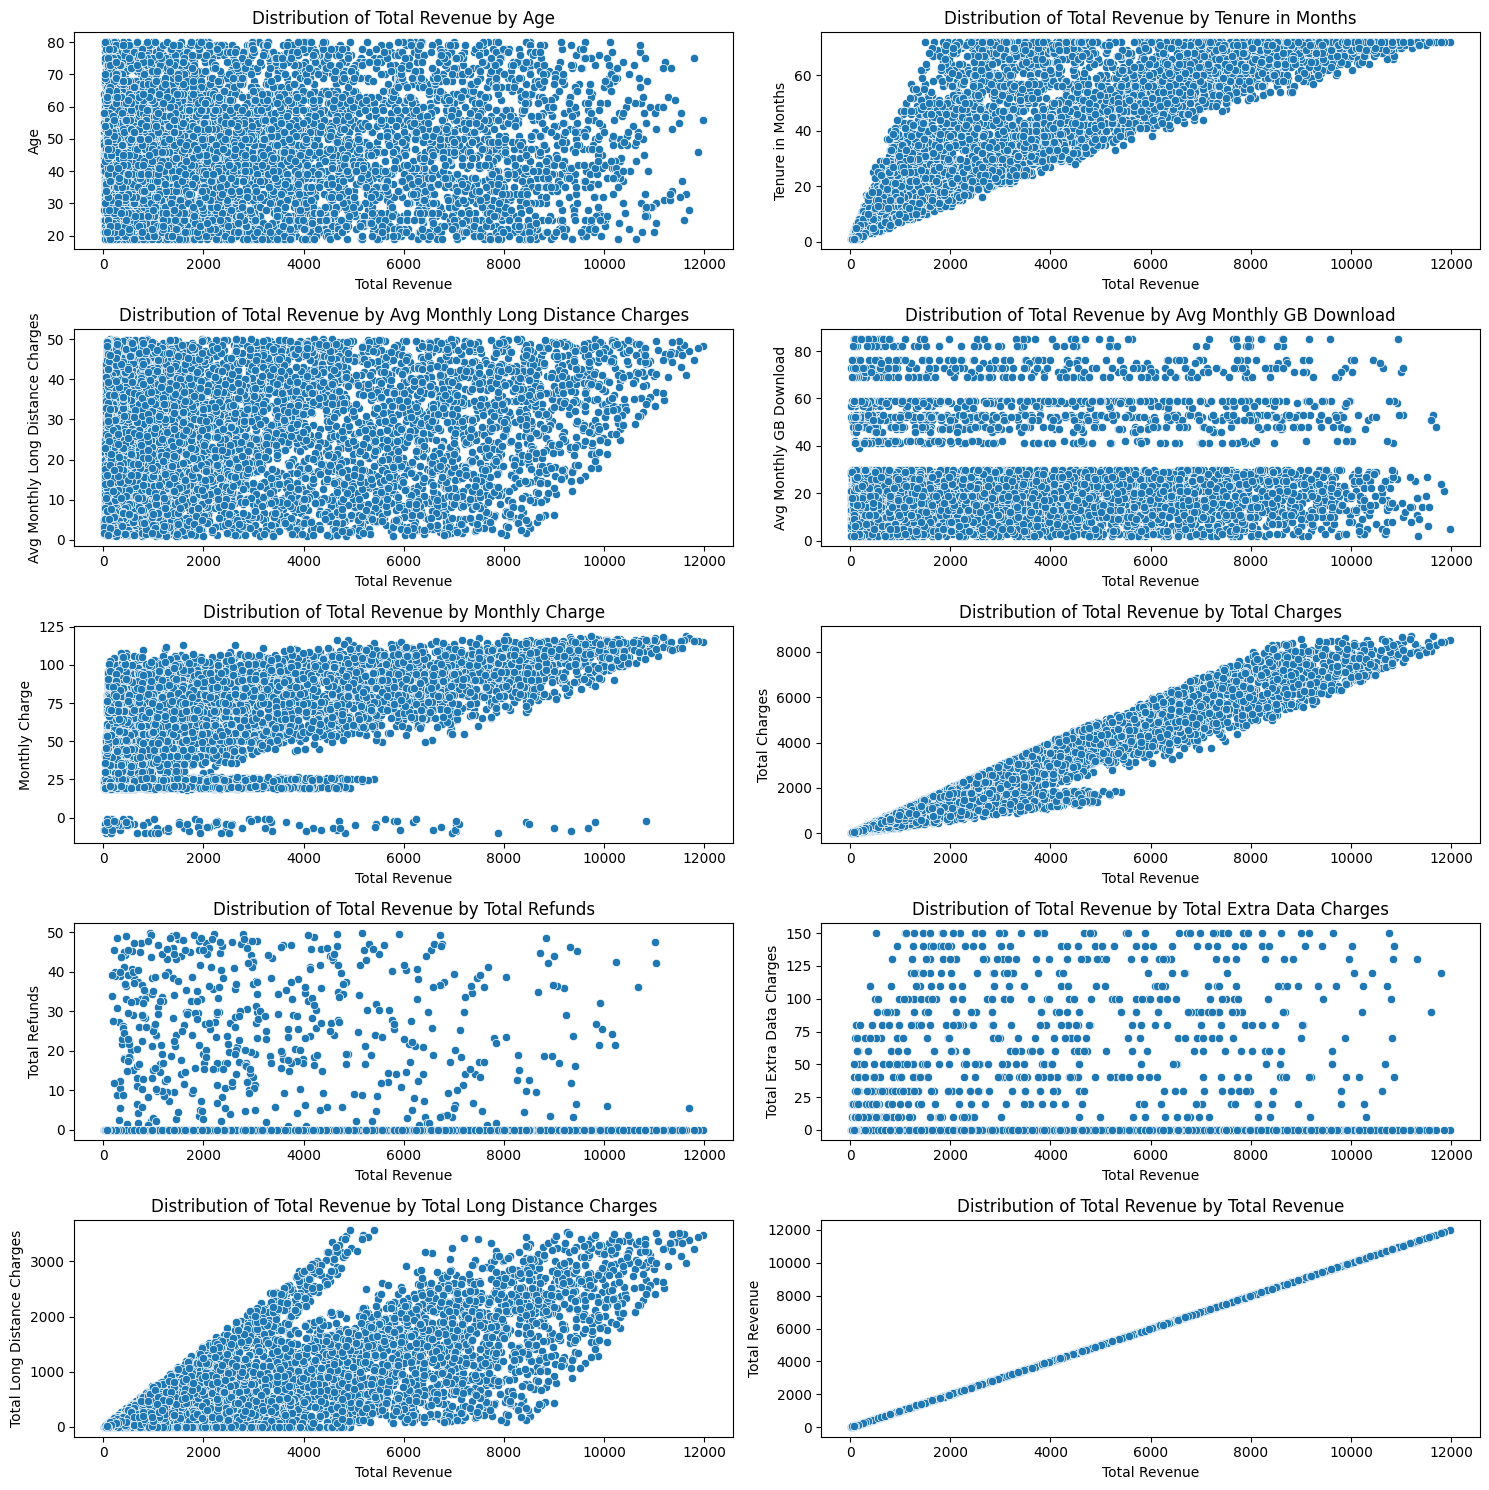

In [ ]:
exclude_column = ["Latitude","Longitude","Population"]
column_list = column_name_df[column_name_df["Variable Type"]=="Continuous"]["Column Name"].tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(5,2,figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.scatterplot(data=df,x="Total Revenue",y=col,ax=ax)
  ax.set_title("Distribution of Total Revenue by "+col)

plt.tight_layout()

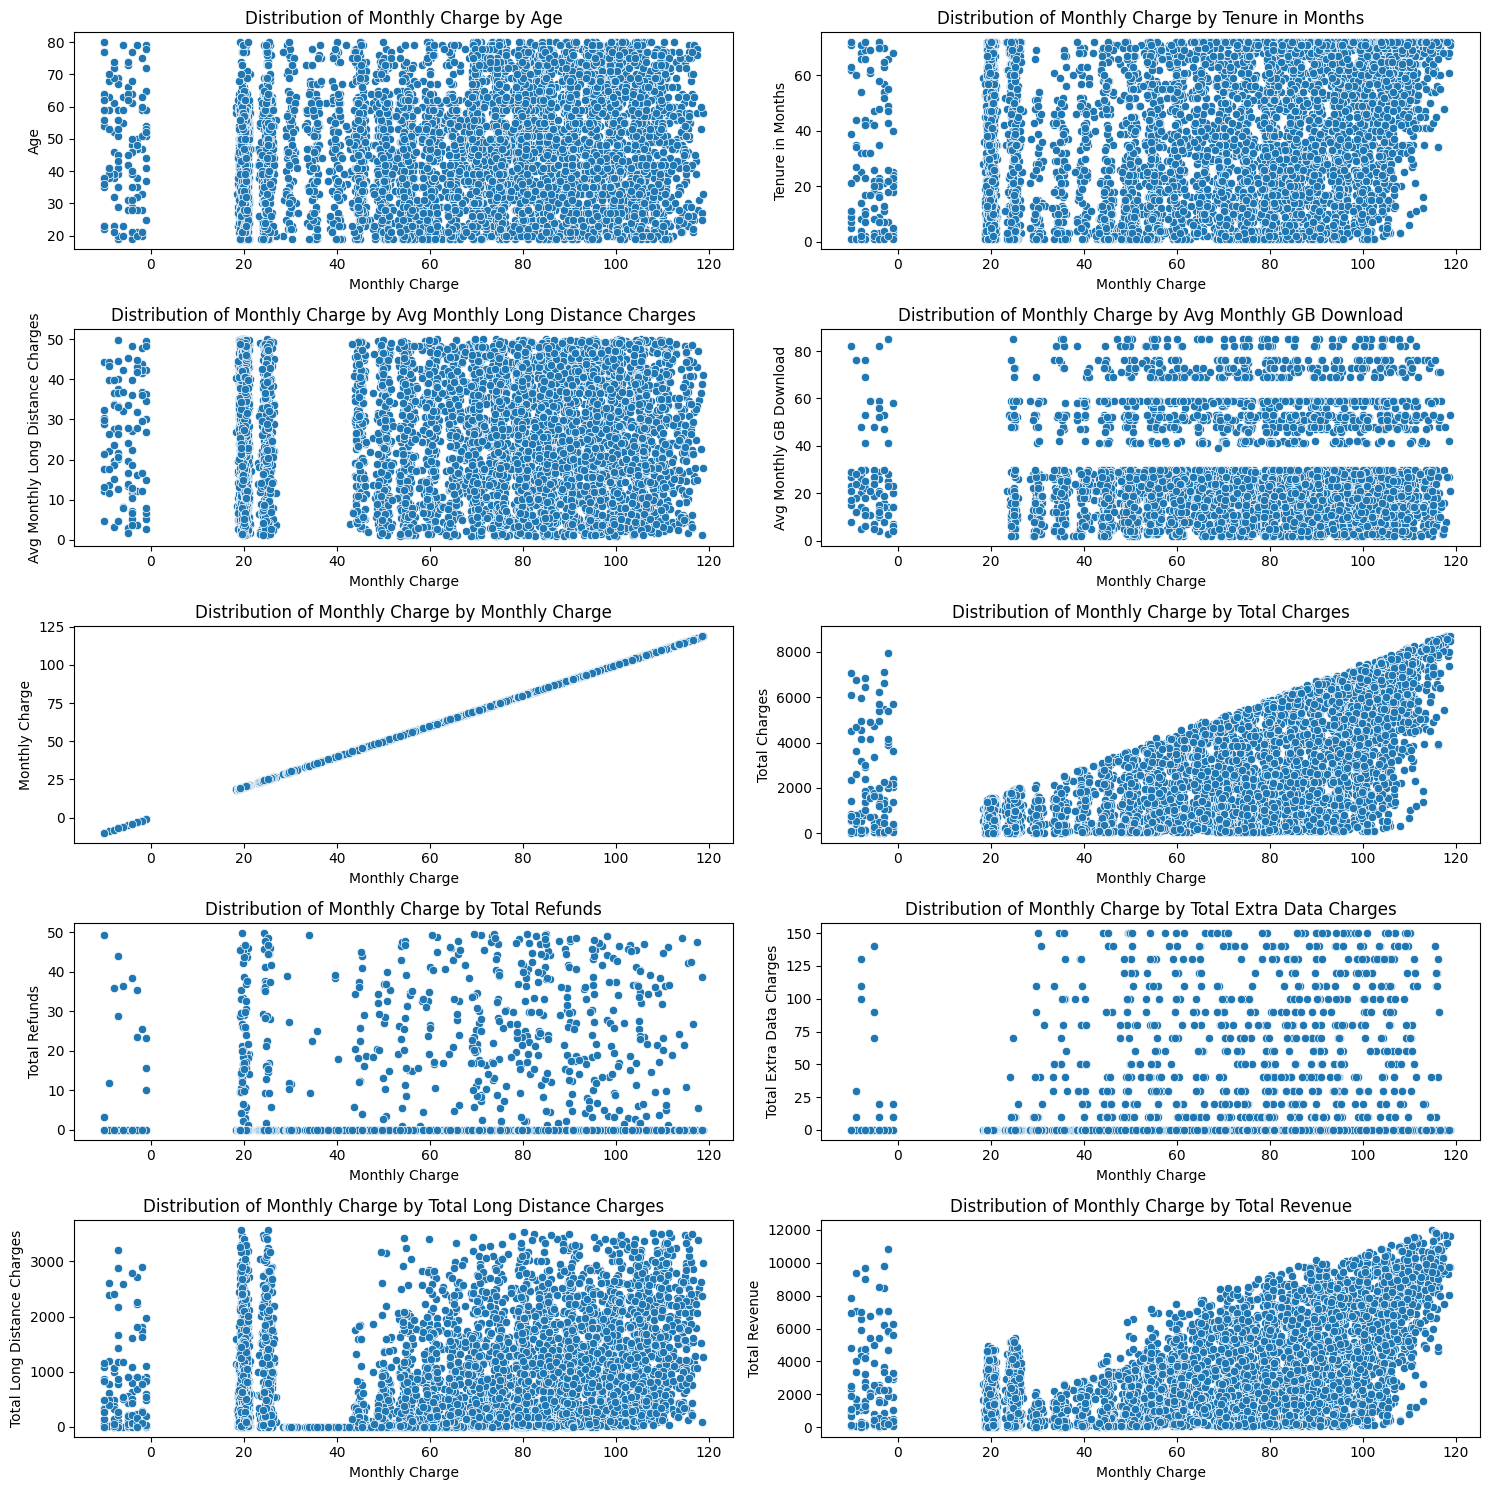

In [ ]:
exclude_column = ["Latitude","Longitude","Population"]
column_list = column_name_df[column_name_df["Variable Type"]=="Continuous"]["Column Name"].tolist()
column_list_filtered = [col for col in column_list if col not in exclude_column]

fig,axes=plt.subplots(5,2,figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(column_list_filtered):
  ax=axes[i]
  sns.scatterplot(data=df,x="Monthly Charge",y=col,ax=ax)
  ax.set_title("Distribution of Monthly Charge by "+col)

plt.tight_layout()

## Remove columns that arent useful

In [ ]:
df["Customer Status"].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [ ]:
#Remove unique columns and dependend columns
df=df.drop(columns=["Customer ID","City","Zip Code","Latitude","Longitude","Churn Category","Churn Reason",
                    "Avg Monthly Long Distance Charges","Multiple Lines",
                    "Internet Type","Avg Monthly GB Download","Online Security","Online Backup","Device Protection Plan","Premium Tech Support","Streaming TV","Streaming Movies", "Streaming Music","Unlimited Data"])

#Remove records of newly joined customers
df=df[df["Customer Status"]!="Joined"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gender                       6589 non-null   object  
 1   Age                          6589 non-null   int64   
 2   Married                      6589 non-null   object  
 3   Number of Dependents         6589 non-null   int64   
 4   Number of Referrals          6589 non-null   category
 5   Tenure in Months             6589 non-null   int64   
 6   Offer                        6589 non-null   object  
 7   Phone Service                6589 non-null   object  
 8   Internet Service             6589 non-null   object  
 9   Contract                     6589 non-null   object  
 10  Paperless Billing            6589 non-null   object  
 11  Payment Method               6589 non-null   object  
 12  Monthly Charge               6589 non-null   float64 
 13  Tot

## Convert categorical variables to numeric variables

In [ ]:
#Try to group Number of Dependents, Number of Referrals and Offer

In [ ]:
df["Married"].value_counts()

Yes    3318
No     3271
Name: Married, dtype: int64

In [ ]:
df["Married"]=df["Married"].replace({"Yes":1,"No":0})

In [ ]:
df["Phone Service"].value_counts()

Yes    5945
No      644
Name: Phone Service, dtype: int64

In [ ]:
df["Phone Service"]=df["Phone Service"].replace({"Yes":1,"No":0})

In [ ]:
df["Internet Service"].value_counts()

Yes    5245
No     1344
Name: Internet Service, dtype: int64

In [ ]:
df["Internet Service"]=df["Internet Service"].replace({"Yes":1,"No":0})

In [ ]:
df["Customer Status"].value_counts()

Stayed     4720
Churned    1869
Name: Customer Status, dtype: int64

In [ ]:
df["Customer Status"]=df["Customer Status"].replace({"Stayed":1,"Churned":0})

In [ ]:
#create the dummies as an array
dummies=[]
cols=["Gender","Offer","Contract","Paperless Billing","Payment Method"]
for col in cols:
  dummies.append(pd.get_dummies(df[col],drop_first=True))

In [ ]:
#Convert the dummy array into dataframe
dummies_df = pd.concat(dummies,axis=1)

In [ ]:
dummies_df

Male  Offer A  Offer B  Offer C  Offer D  Offer E  One Year  Two Year  \
0        0        0        0        0        0        0         1         0   
1        1        0        0        0        1        0         0         0   
2        0        0        1        0        0        0         0         0   
3        1        0        0        0        0        0         1         0   
4        1        0        0        0        0        0         0         0   
...    ...      ...      ...      ...      ...      ...       ...       ...   
7038     0        0        0        0        0        0         0         0   
7039     1        0        0        0        0        0         0         1   
7040     1        0        0        0        0        0         0         0   
7041     1        0        0        0        0        0         1         0   
7042     0        1        0        0        0        0         0         1   

      Yes  Credit Card  Mailed Check  
0       1            1             0  
1       1            1             0  
2       1            0             0  
3       1            0             0  
4       0            1             0  
...   ...          ...           ...  
7038    0            1             0  
7039    0            0             0  
7040    0            0             0  
7041    1            0             0  
7042    1            0             0  

[6589 rows x 11 columns]

In [ ]:
#Add new columns into the main dataframe
df=pd.concat([df,dummies_df],axis=1)

In [ ]:
#Drop the original columns
df=df.drop(columns=cols)

In [ ]:
#Rename the dummies columns
df=df.rename(columns={"Male":"Gender Male",
                      "One Year":"Contract One Year",
                      "Two Year":"Contract Two Year",
                      "Yes":"Paperless Billing",
                      "Credit Card":"Payment Method Credit Card",
                      "Mailed Check":"Payment Method Mailed Check"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          6589 non-null   int64   
 1   Married                      6589 non-null   int64   
 2   Number of Dependents         6589 non-null   int64   
 3   Number of Referrals          6589 non-null   category
 4   Tenure in Months             6589 non-null   int64   
 5   Phone Service                6589 non-null   int64   
 6   Internet Service             6589 non-null   int64   
 7   Monthly Charge               6589 non-null   float64 
 8   Total Charges                6589 non-null   float64 
 9   Total Refunds                6589 non-null   float64 
 10  Total Extra Data Charges     6589 non-null   int64   
 11  Total Long Distance Charges  6589 non-null   float64 
 12  Total Revenue                6589 non-null   float64 
 13  Cus

## Split data into training and testing

In [ ]:
X=df.drop(columns="Customer Status")
Y=df[["Customer Status"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=100, shuffle=True,test_size=0.2)

##Handling missing values

In [ ]:
#There is no missing value in the dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5271 entries, 4898 to 6031
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          5271 non-null   int64   
 1   Married                      5271 non-null   int64   
 2   Number of Dependents         5271 non-null   int64   
 3   Number of Referrals          5271 non-null   category
 4   Tenure in Months             5271 non-null   int64   
 5   Phone Service                5271 non-null   int64   
 6   Internet Service             5271 non-null   int64   
 7   Monthly Charge               5271 non-null   float64 
 8   Total Charges                5271 non-null   float64 
 9   Total Refunds                5271 non-null   float64 
 10  Total Extra Data Charges     5271 non-null   int64   
 11  Total Long Distance Charges  5271 non-null   float64 
 12  Total Revenue                5271 non-null   float64 
 13  

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 3133 to 5284
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          1318 non-null   int64   
 1   Married                      1318 non-null   int64   
 2   Number of Dependents         1318 non-null   int64   
 3   Number of Referrals          1318 non-null   category
 4   Tenure in Months             1318 non-null   int64   
 5   Phone Service                1318 non-null   int64   
 6   Internet Service             1318 non-null   int64   
 7   Monthly Charge               1318 non-null   float64 
 8   Total Charges                1318 non-null   float64 
 9   Total Refunds                1318 non-null   float64 
 10  Total Extra Data Charges     1318 non-null   int64   
 11  Total Long Distance Charges  1318 non-null   float64 
 12  Total Revenue                1318 non-null   float64 
 13  

## Data standardisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Create new instance
scaler=MinMaxScaler()
#Fit the scaler into training set and use it to transform the testing set
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Looking at outliers

In [ ]:
#Using Z Score Outlier for these columns
cols=["Age","Monthly Charge","Total Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges","Total Revenue"]

for col in cols:
  X_train[col+"_Z"] = (X_train[col] - X_train[col].mean())/X_train[col].std()

In [ ]:
X_train[X_train["Age_Z"]<-3]

Empty DataFrame
Columns: [Age, Married, Number of Dependents, Number of Referrals, Tenure in Months, Phone Service, Internet Service, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Population, Gender Male, Offer A, Offer B, Offer C, Offer D, Offer E, Contract One Year, Contract Two Year, Paperless Billing, Payment Method Credit Card, Payment Method Mailed Check, Age_Z, Monthly Charge_Z, Total Charges_Z, Total Refunds_Z, Total Extra Data Charges_Z, Total Long Distance Charges_Z, Total Revenue_Z]
Index: []

[0 rows x 32 columns]

In [ ]:
X_train[X_train["Age_Z"]>3]

Empty DataFrame
Columns: [Age, Married, Number of Dependents, Number of Referrals, Tenure in Months, Phone Service, Internet Service, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Population, Gender Male, Offer A, Offer B, Offer C, Offer D, Offer E, Contract One Year, Contract Two Year, Paperless Billing, Payment Method Credit Card, Payment Method Mailed Check, Age_Z, Monthly Charge_Z, Total Charges_Z, Total Refunds_Z, Total Extra Data Charges_Z, Total Long Distance Charges_Z, Total Revenue_Z]
Index: []

[0 rows x 32 columns]

In [ ]:
X_train[X_train["Total Charges_Z"]<-3]

Empty DataFrame
Columns: [Age, Married, Number of Dependents, Number of Referrals, Tenure in Months, Phone Service, Internet Service, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Population, Gender Male, Offer A, Offer B, Offer C, Offer D, Offer E, Contract One Year, Contract Two Year, Paperless Billing, Payment Method Credit Card, Payment Method Mailed Check, Age_Z, Monthly Charge_Z, Total Charges_Z, Total Refunds_Z, Total Extra Data Charges_Z, Total Long Distance Charges_Z, Total Revenue_Z]
Index: []

[0 rows x 32 columns]

In [ ]:
X_train[X_train["Total Charges_Z"]>3]

Empty DataFrame
Columns: [Age, Married, Number of Dependents, Number of Referrals, Tenure in Months, Phone Service, Internet Service, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Population, Gender Male, Offer A, Offer B, Offer C, Offer D, Offer E, Contract One Year, Contract Two Year, Paperless Billing, Payment Method Credit Card, Payment Method Mailed Check, Age_Z, Monthly Charge_Z, Total Charges_Z, Total Refunds_Z, Total Extra Data Charges_Z, Total Long Distance Charges_Z, Total Revenue_Z]
Index: []

[0 rows x 32 columns]

In [ ]:
X_train[X_train["Monthly Charge_Z"]<-3]

Empty DataFrame
Columns: [Age, Married, Number of Dependents, Number of Referrals, Tenure in Months, Phone Service, Internet Service, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Population, Gender Male, Offer A, Offer B, Offer C, Offer D, Offer E, Contract One Year, Contract Two Year, Paperless Billing, Payment Method Credit Card, Payment Method Mailed Check, Age_Z, Monthly Charge_Z, Total Charges_Z, Total Refunds_Z, Total Extra Data Charges_Z, Total Long Distance Charges_Z, Total Revenue_Z]
Index: []

[0 rows x 32 columns]

In [ ]:
X_train[X_train["Monthly Charge_Z"]>3]

Empty DataFrame
Columns: [Age, Married, Number of Dependents, Number of Referrals, Tenure in Months, Phone Service, Internet Service, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Population, Gender Male, Offer A, Offer B, Offer C, Offer D, Offer E, Contract One Year, Contract Two Year, Paperless Billing, Payment Method Credit Card, Payment Method Mailed Check, Age_Z, Monthly Charge_Z, Total Charges_Z, Total Refunds_Z, Total Extra Data Charges_Z, Total Long Distance Charges_Z, Total Revenue_Z]
Index: []

[0 rows x 32 columns]

In [ ]:
X_train[X_train["Total Refunds_Z"]<-3]

Empty DataFrame
Columns: [Age, Married, Number of Dependents, Number of Referrals, Tenure in Months, Phone Service, Internet Service, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Population, Gender Male, Offer A, Offer B, Offer C, Offer D, Offer E, Contract One Year, Contract Two Year, Paperless Billing, Payment Method Credit Card, Payment Method Mailed Check, Age_Z, Monthly Charge_Z, Total Charges_Z, Total Refunds_Z, Total Extra Data Charges_Z, Total Long Distance Charges_Z, Total Revenue_Z]
Index: []

[0 rows x 32 columns]

In [ ]:
X_train[X_train["Total Refunds_Z"]>3]

Age  Married  Number of Dependents Number of Referrals  \
2123   68        0                     0                   0   
2235   46        0                     0                   0   
1393   45        1                     2                   1   
5932   65        0                     0                   0   
2839   53        1                     0                   2   
...   ...      ...                   ...                 ...   
2493   40        0                     1                   0   
1935   44        1                     3                   1   
6146   35        1                     3                   9   
6440   55        0                     0                   0   
4422   20        0                     0                   0   

      Tenure in Months  Phone Service  Internet Service  Monthly Charge  \
2123                13              1                 1           90.50   
2235                10              1                 1           45.25   
1393                56              1                 1           59.80   
5932                12              1                 1           83.80   
2839                44              1                 1           84.80   
...                ...            ...               ...             ...   
2493                13              1                 1           53.45   
1935                58              1                 1           71.60   
6146                 4              1                 1           78.90   
6440                34              1                 1           64.35   
4422                36              1                 1           94.80   

      Total Charges  Total Refunds  ...  Paperless Billing  \
2123        1201.15          29.84  ...                  1   
2235         428.70          44.90  ...                  0   
1393        3457.45          35.01  ...                  1   
5932        1029.75          44.58  ...                  1   
2839        3626.35          43.96  ...                  1   
...             ...            ...  ...                ...   
2493         718.10          26.37  ...                  0   
1935        4230.25          45.54  ...                  0   
6146         299.75          37.01  ...                  1   
6440        2053.05          46.39  ...                  0   
4422        3565.65          30.26  ...                  1   

      Payment Method Credit Card  Payment Method Mailed Check     Age_Z  \
2123                           0                            0  1.265748   
2235                           1                            0 -0.038743   
1393                           0                            0 -0.098038   
5932                           1                            0  1.087863   
2839                           1                            0  0.376323   
...                          ...                          ...       ...   
2493                           1                            0 -0.394513   
1935                           1                            0 -0.157333   
6146                           1                            0 -0.690988   
6440                           0                            0  0.494913   
4422                           1                            0 -1.580413   

      Monthly Charge_Z  Total Charges_Z  Total Refunds_Z  \
2123          0.816755        -0.539475         3.501217   
2235         -0.634125        -0.878605         5.394593   
1393         -0.167599         0.451114         4.151200   
5932          0.601928        -0.614725         5.354362   
2839          0.633992         0.525266         5.276414   
...                ...              ...              ...   
2493         -0.371203        -0.751549         3.064961   
1935          0.210752         0.790398         5.475055   
6146          0.444817        -0.935218         4.402645   
6440         -0.021709        -0.165463         5.581919   
4422          0.954628        

In [ ]:
X_train[X_train["Total Refunds_Z"]>3][["Age","Married","Number of Dependents","Number of Referrals","Tenure in Months","Phone Service","Internet Service","Monthly Charge","Total Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges","Total Revenue"]].describe()

Age     Married  Number of Dependents  Tenure in Months  \
count  200.000000  200.000000            200.000000        200.000000   
mean    47.945000    0.575000              0.535000         36.715000   
std     17.497221    0.495584              0.981628         22.014472   
min     19.000000    0.000000              0.000000          2.000000   
25%     33.000000    0.000000              0.000000         16.750000   
50%     48.000000    1.000000              0.000000         34.000000   
75%     62.250000    1.000000              1.000000         58.000000   
max     80.000000    1.000000              4.000000         72.000000   

       Phone Service  Internet Service  Monthly Charge  Total Charges  \
count     200.000000        200.000000      200.000000     200.000000   
mean        0.930000          0.810000       66.556750    2540.201500   
std         0.255787          0.393285       31.177323    2111.620669   
min         0.000000          0.000000      -10.000000     210.750000   
25%         1.000000          1.000000       45.287500     871.262500   
50%         1.000000          1.000000       74.250000    1768.475000   
75%         1.000000          1.000000       89.975000    3826.637500   
max         1.000000          1.000000      118.600000    8670.100000   

       Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
count     200.000000                200.000000                   200.000000   
mean       38.357800                  9.400000                   844.123050   
std         7.217591                 30.186023                   852.461497   
min        26.320000                  0.000000                     0.000000   
25%        32.202500                  0.000000                   182.882500   
50%        38.395000                  0.000000                   512.360000   
75%        45.145000                  0.000000                  1449.357500   
max        49.790000                150.000000                  3427.200000   

       Total Revenue  
count     200.000000  
mean     3355.366750  
std      2634.142344  
min       171.480000  
25%      1325.750000  
50%      2619.295000  
75%      4718.747500  
max     11033.900000

In [ ]:
X_train[X_train["Total Extra Data Charges_Z"]<-3]

Empty DataFrame
Columns: [Age, Married, Number of Dependents, Number of Referrals, Tenure in Months, Phone Service, Internet Service, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Population, Gender Male, Offer A, Offer B, Offer C, Offer D, Offer E, Contract One Year, Contract Two Year, Paperless Billing, Payment Method Credit Card, Payment Method Mailed Check, Age_Z, Monthly Charge_Z, Total Charges_Z, Total Refunds_Z, Total Extra Data Charges_Z, Total Long Distance Charges_Z, Total Revenue_Z]
Index: []

[0 rows x 32 columns]

In [ ]:
X_train[X_train["Total Extra Data Charges_Z"]>3]

Age  Married  Number of Dependents Number of Referrals  \
2509   22        1                     0                   6   
2123   68        0                     0                   0   
1556   65        0                     0                   0   
2974   66        1                     0                   1   
1185   56        0                     0                   0   
...   ...      ...                   ...                 ...   
1370   22        0                     0                   0   
2657   63        0                     0                   0   
737    20        0                     0                   0   
659    46        0                     0                   0   
2028   27        1                     0                   2   

      Tenure in Months  Phone Service  Internet Service  Monthly Charge  \
2509                47              1                 1           85.30   
2123                13              1                 1           90.50   
1556                22              1                 1           96.70   
2974                72              1                 1          109.75   
1185                53              1                 1           80.60   
...                ...            ...               ...             ...   
1370                38              1                 1          103.65   
2657                38              1                 1           89.10   
737                 12              1                 1           49.40   
659                 29              1                 1          100.55   
2028                57              0                 1           57.50   

      Total Charges  Total Refunds  ...  Paperless Billing  \
2509        4107.25           0.00  ...                  1   
2123        1201.15          29.84  ...                  1   
1556        2082.95           0.00  ...                  1   
2974        7932.50           0.00  ...                  1   
1185        4348.10          39.45  ...                  1   
...             ...            ...  ...                ...   
1370        3988.50           0.00  ...                  1   
2657        3342.00           0.00  ...                  1   
737          611.65           0.00  ...                  1   
659         2830.45           0.00  ...                  0   
2028        3265.95           0.00  ...                  1   

      Payment Method Credit Card  Payment Method Mailed Check     Age_Z  \
2509                           1                            0 -1.461823   
2123                           0                            0  1.265748   
1556                           0                            0  1.087863   
2974                           0                            0  1.147158   
1185                           1                            0  0.554208   
...                          ...                          ...       ...   
1370                           0                            0 -1.461823   
2657                           0                            1  0.969273   
737                            0                            0 -1.580413   
659                            1                            0 -0.038743   
2028                           0                            0 -1.165348   

      Monthly Charge_Z  Total Charges_Z  Total Refunds_Z  \
2509          0.650024         0.736397        -0.250334   
2123          0.816755        -0.539475         3.501217   
1556          1.015549        -0.152336        -0.250334   
2974          1.433980         2.415805        -0.250334   
1185          0.499325         0.842138         4.709407   
...                ...              ...              ...   
1370          1.238392         0.684262        -0.250334   
2657          0.771866         0.400427        -0.250334   
737          -0.501061        -0.798284        -0.250334   
659           1.138994         0.175840        -0.250334   
2028         -0.241345        

In [ ]:
X_train[X_train["Total Extra Data Charges_Z"]>3][["Age","Married","Number of Dependents","Number of Referrals","Tenure in Months","Phone Service","Internet Service","Monthly Charge","Total Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges","Total Revenue"]].describe()

Age     Married  Number of Dependents  Tenure in Months  \
count  197.000000  197.000000            197.000000        197.000000   
mean    48.456853    0.527919              0.385787         43.609137   
std     17.782542    0.500492              0.888361         20.996222   
min     19.000000    0.000000              0.000000         10.000000   
25%     33.000000    0.000000              0.000000         24.000000   
50%     49.000000    1.000000              0.000000         46.000000   
75%     63.000000    1.000000              0.000000         62.000000   
max     80.000000    1.000000              4.000000         72.000000   

       Phone Service  Internet Service  Monthly Charge  Total Charges  \
count     197.000000             197.0      197.000000     197.000000   
mean        0.868020               1.0       78.117513    3629.040355   
std         0.339331               0.0       25.519272    2264.421180   
min         0.000000               1.0       -8.000000     291.400000   
25%         1.000000               1.0       60.050000    1524.850000   
50%         1.000000               1.0       83.350000    3265.950000   
75%         1.000000               1.0       98.850000    5508.350000   
max         1.000000               1.0      116.450000    8443.700000   

       Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
count     197.000000                197.000000                   197.000000   
mean        2.699340                121.015228                  1027.646193   
std         9.497498                 20.478579                   893.098337   
min         0.000000                 90.000000                     0.000000   
25%         0.000000                100.000000                   286.650000   
50%         0.000000                120.000000                   824.380000   
75%         0.000000                140.000000                  1588.380000   
max        48.790000                150.000000                  3493.440000   

       Total Revenue  
count     197.000000  
mean     4775.002437  
std      2887.587707  
min       401.400000  
25%      2108.720000  
50%      4478.160000  
75%      7006.780000  
max     11795.780000

In [ ]:
X_train[X_train["Total Long Distance Charges_Z"]<-3]

Empty DataFrame
Columns: [Age, Married, Number of Dependents, Number of Referrals, Tenure in Months, Phone Service, Internet Service, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Population, Gender Male, Offer A, Offer B, Offer C, Offer D, Offer E, Contract One Year, Contract Two Year, Paperless Billing, Payment Method Credit Card, Payment Method Mailed Check, Age_Z, Monthly Charge_Z, Total Charges_Z, Total Refunds_Z, Total Extra Data Charges_Z, Total Long Distance Charges_Z, Total Revenue_Z]
Index: []

[0 rows x 32 columns]

In [ ]:
X_train[X_train["Total Long Distance Charges_Z"]>3]

Age  Married  Number of Dependents Number of Referrals  \
5275   38        1                     0                   1   
87     39        1                     3                   7   
3463   47        1                     2                   5   
6444   54        1                     2                   3   
5749   21        1                     0                   5   
3058   40        1                     0                  10   
1186   38        1                     2                   1   
5042   20        1                     2                   1   
6536   21        1                     3                  10   
1472   42        1                     3                   8   
904    80        1                     1                   7   
334    30        1                     0                   2   
1999   72        1                     0                   5   
1603   53        1                     1                   9   
211    56        0                     0                   0   
1284   59        1                     3                   4   
6794   44        1                     0                   1   
6833   75        0                     0                   0   
2392   73        1                     0                   5   
5737   55        0                     0                   0   
900    46        1                     0                   2   
1482   43        1                     0                   1   
1809   32        1                     0                   1   
4274   25        0                     0                   0   
5814   22        0                     0                   0   
14     30        0                     0                   0   
4131   45        1                     0                   9   
6922   53        1                     0                   9   
1793   28        1                     1                  10   
6658   61        1                     0                   1   

      Tenure in Months  Phone Service  Internet Service  Monthly Charge  \
5275                72              1                 0           19.40   
87                  72              1                 1           80.20   
3463                70              1                 0           20.05   
6444                72              1                 0           24.75   
5749                71              1                 1           54.50   
3058                72              1                 1           82.30   
1186                70              1                 0           19.80   
5042                69              1                 1           81.95   
6536                71              1                 1           77.55   
1472                72              1                 0           24.25   
904                 71              1                 1           69.20   
334                 69              1                 1           99.45   
1999                72              1                 1           84.10   
1603                72              1                 0           19.70   
211                 72              1                 1          114.90   
1284                72              1                 0           24.05   
6794                72              1                 0           20.05   
6833                71              1                 1          104.05   
2392                69              1                 1           95.35   
5737                71              1                 1          111.30   
900                 72              1                 1          115.55   
1482                68              1                 1          100.30   
1809                72              1                 1          111.90   
4274                72              1                 1          116.45   
5814                72              1                 1           86.05   
14                  71              1                 1          108.05

In [ ]:
X_train[X_train["Total Long Distance Charges_Z"]>3][["Age","Married","Number of Dependents","Number of Referrals","Tenure in Months","Phone Service","Internet Service","Monthly Charge","Total Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges","Total Revenue"]].describe()

Age    Married  Number of Dependents  Tenure in Months  \
count  30.000000  30.000000             30.000000         30.000000   
mean   44.733333   0.800000              0.766667         71.166667   
std    16.927703   0.406838              1.135124          1.147211   
min    20.000000   0.000000              0.000000         68.000000   
25%    30.500000   1.000000              0.000000         71.000000   
50%    43.500000   1.000000              0.000000         72.000000   
75%    54.750000   1.000000              1.750000         72.000000   
max    80.000000   1.000000              3.000000         72.000000   

       Phone Service  Internet Service  Monthly Charge  Total Charges  \
count           30.0         30.000000       30.000000      30.000000   
mean             1.0          0.666667       71.421667    5066.765000   
std              0.0          0.479463       38.304922    2722.787912   
min              1.0          0.000000       19.400000    1360.250000   
25%              1.0          0.000000       24.812500    1798.675000   
50%              1.0          1.000000       82.125000    5764.675000   
75%              1.0          1.000000      107.050000    7502.500000   
max              1.0          1.000000      117.600000    8496.700000   

       Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
count      30.000000                 30.000000                    30.000000   
mean        1.840000                  6.666667                  3451.007000   
std         9.104912                 22.944210                    54.845386   
min         0.000000                  0.000000                  3366.680000   
25%         0.000000                  0.000000                  3403.137500   
50%         0.000000                  0.000000                  3443.775000   
75%         0.000000                  0.000000                  3486.420000   
max        49.760000                 90.000000                  3564.720000   

       Total Revenue  
count      30.000000  
mean     8522.598667  
std      2731.541139  
min      4760.150000  
25%      5212.717500  
50%      9276.835000  
75%     10983.630000  
max     11979.340000

In [ ]:
X_train[X_train["Total Revenue_Z"]<-3]

Empty DataFrame
Columns: [Age, Married, Number of Dependents, Number of Referrals, Tenure in Months, Phone Service, Internet Service, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Population, Gender Male, Offer A, Offer B, Offer C, Offer D, Offer E, Contract One Year, Contract Two Year, Paperless Billing, Payment Method Credit Card, Payment Method Mailed Check, Age_Z, Monthly Charge_Z, Total Charges_Z, Total Refunds_Z, Total Extra Data Charges_Z, Total Long Distance Charges_Z, Total Revenue_Z]
Index: []

[0 rows x 32 columns]

In [ ]:
X_train[X_train["Total Revenue_Z"]>3]

Age  Married  Number of Dependents Number of Referrals  Tenure in Months  \
211   56        0                     0                   0                72   
900   46        1                     0                   2                72   

     Phone Service  Internet Service  Monthly Charge  Total Charges  \
211              1                 1          114.90         8496.7   
900              1                 1          115.55         8425.3   

     Total Refunds  ...  Paperless Billing  Payment Method Credit Card  \
211            0.0  ...                  1                           0   
900            0.0  ...                  1                           0   

     Payment Method Mailed Check     Age_Z  Monthly Charge_Z  Total Charges_Z  \
211                            0  0.554208          1.599108         2.663507   
900                            0 -0.038743          1.619949         2.632160   

     Total Refunds_Z  Total Extra Data Charges_Z  \
211        -0.250334                   -0.273344   
900        -0.250334                   -0.273344   

     Total Long Distance Charges_Z  Total Revenue_Z  
211                       3.138870         3.051569  
900                       3.092551         3.012838  

[2 rows x 32 columns]

In [ ]:
X_train[X_train["Total Revenue_Z"]>3][["Age","Married","Number of Dependents","Number of Referrals","Tenure in Months","Phone Service","Internet Service","Monthly Charge","Total Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges","Total Revenue"]]

Age  Married  Number of Dependents Number of Referrals  Tenure in Months  \
211   56        0                     0                   0                72   
900   46        1                     0                   2                72   

     Phone Service  Internet Service  Monthly Charge  Total Charges  \
211              1                 1          114.90         8496.7   
900              1                 1          115.55         8425.3   

     Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
211            0.0                         0                      3482.64   
900            0.0                         0                      3443.04   

     Total Revenue  
211       11979.34  
900       11868.34

In [ ]:
#Drop additional columns
cols=["Age","Monthly Charge","Total Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges","Total Revenue"]

for col in cols:
  X_train = X_train.drop(columns=col+"_Z")

## Balancing the dataset

In [ ]:
Y_train.value_counts()

Customer Status
1                  3777
0                  1494
dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#oversampling the scaled data
ros = RandomOverSampler(random_state=100)
X_train_scaled_resampled, Y_train_resampled = ros.fit_resample(X_train_scaled, Y_train)

In [ ]:
#oversampling the original data
ros = RandomOverSampler(random_state=100)
X_train_resampled, Y_train_resampled = ros.fit_resample(X_train, Y_train)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#undersampling the scaled data
rus = RandomUnderSampler(random_state=100)
X_train_scaled_under_resampled, Y_train_under_resampled = rus.fit_resample(X_train_scaled, Y_train)

In [ ]:
#undersampling the original data
rus = RandomUnderSampler(random_state=100)
X_train_under_resampled, Y_train_under_resampled = rus.fit_resample(X_train, Y_train)

# Predict Customer Status using Classification models

## Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, r2_score, classification_report, confusion_matrix
from statsmodels.api import Logit
from statsmodels.tools import add_constant

**With unscaled and unbalanced data**

In [ ]:
#create a logistics regression
model = LogisticRegression(random_state=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#Evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))

0.8186646433990895
0.7536132909155179
0.10922021915871338


In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[226 149]
 [ 90 853]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65       375
           1       0.85      0.90      0.88       943

    accuracy                           0.82      1318
   macro avg       0.78      0.75      0.77      1318
weighted avg       0.81      0.82      0.81      1318



**With scaled and unbalanced data**

In [ ]:
#create a logistics regression
model = LogisticRegression(random_state=100)
model.fit(X_train_scaled, Y_train)
Y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))

0.8467374810318664
0.8077652880876636
0.24712336514669497


In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[269 106]
 [ 96 847]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       375
           1       0.89      0.90      0.89       943

    accuracy                           0.85      1318
   macro avg       0.81      0.81      0.81      1318
weighted avg       0.85      0.85      0.85      1318



**With unscaled and balanced data**

In [ ]:
#create a logistics regression
model = LogisticRegression(random_state=100)
model.fit(X_train_resampled, Y_train_resampled)
Y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#Evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))

0.7405159332321699
0.7471869918699188
-0.2746723223753975


In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[286  89]
 [253 690]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.76      0.63       375
           1       0.89      0.73      0.80       943

    accuracy                           0.74      1318
   macro avg       0.71      0.75      0.71      1318
weighted avg       0.78      0.74      0.75      1318



**With scaled and balanced data**

In [ ]:
#create a logistics regression
model = LogisticRegression(random_state=100)
model.fit(X_train_scaled_resampled, Y_train_resampled)
Y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#Evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))

0.8148710166919575
0.8280607988688582
0.09058465889006728


In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[322  53]
 [191 752]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       375
           1       0.93      0.80      0.86       943

    accuracy                           0.81      1318
   macro avg       0.78      0.83      0.79      1318
weighted avg       0.85      0.81      0.82      1318



**With scaled and balanced data** the model seems to have the **best performance**, view the Regression table and Regression model as below

In [ ]:
X_train_scaled_resampled_df = pd.DataFrame(X_train_scaled_resampled, columns= X_train.columns)

In [ ]:
#Create Logistic Regression Table
model = Logit(Y_train_resampled, add_constant(X_train_scaled_resampled_df)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.366409
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:        Customer Status   No. Observations:                 7554
Model:                          Logit   Df Residuals:                     7529
Method:                           MLE   Df Model:                           24
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.4714
Time:                        16:27:58   Log-Likelihood:                -2767.9
converged:                       True   LL-Null:                       -5236.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5543   3606.880     -0.000      1.000   

In [ ]:
#Remove some features with higher p-value than 0.05
model = Logit(Y_train_resampled, add_constant(X_train_scaled_resampled_df.drop(columns=["Internet Service","Total Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges","Total Long Distance Charges","Total Revenue","Gender Male"]))).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.369713
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Customer Status   No. Observations:                 7554
Model:                          Logit   Df Residuals:                     7535
Method:                           MLE   Df Model:                           18
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.4666
Time:                        16:27:58   Log-Likelihood:                -2792.8
converged:                       True   LL-Null:                       -5236.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0914      0.157      0.582      0.560   

Log(Y/(1-Y)) = 0.0914 - 0.7514 * Age - 1.4383 * Married + 4.8782 * Number of Dependents + 5.6443 * Number of Referrals + 2.5284 * Tenure in Months + 0.5265 * Phone Service - 2.9587 * Monthly Charge - 0.8094 * Population - 0.9386 * Offer A +0.2914 * Offer B + 0.4950 * Offer C + 0.8884 * Offer D - 0.6984 * Offer E + 1.4927 * Contract One Year + 2.9210 * Contract Two Year - 0.3256 * Paperless Billing + 0.4601 * Payment Method Credit Card - 0.4226 * Payment Method Mailed Check

## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

**With scaled and unbalanced data**

In [ ]:
#Try different hyperparameters by Grid Search Approach
n_neighbors = np.arange(1,11)
metrics = ["minkowski","manhattan","euclidean","canberra"]
weights = ["uniform","distance"]
results = []

for n in n_neighbors:
  for m in metrics:
    for w in weights:
      model = KNeighborsClassifier(n_neighbors=n, metric=m, weights=w)
      model.fit(X_train_scaled, Y_train.values.ravel()) #use ravel() to get rid of the warnings
      Y_pred = model.predict(X_test_scaled)
      report = classification_report(Y_test, Y_pred, output_dict=True)
      results.append({'Combination': f'n={n}, m={m}, w={w}',
                      'accuracy_score': accuracy_score(Y_test, Y_pred),
                      'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                      'Precision of Churned': report['0']['precision'],
                      'Recall of Churned': report['0']['recall'],
                      'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
14    n=2, m=canberra, w=uniform        0.760243                0.779444   
10   n=2, m=manhattan, w=uniform        0.754173                0.764762   
62    n=8, m=canberra, w=uniform        0.837633                0.819071   
46    n=6, m=canberra, w=uniform        0.824734                0.810057   
30    n=4, m=canberra, w=uniform        0.798938                0.791227   
..                           ...             ...                     ...   
1   n=1, m=minkowski, w=distance        0.773900                0.719921   
4    n=1, m=euclidean, w=uniform        0.773900                0.719921   
5   n=1, m=euclidean, w=distance        0.773900                0.719921   
9   n=2, m=minkowski, w=distance        0.773900                0.719921   
13  n=2, m=euclidean, w=distance        0.773900                0.719921   

    Precision of Churned  Recall of Churned        F1  
14              0.552773           0.824000  0.661670  
10              0.547135           0.789333  0.646288  
62              0.691211           0.776000  0.731156  
46              0.664384           0.776000  0.715867  
30              0.617021           0.773333  0.686391  
..                   ...                ...       ...  
1               0.604336           0.594667  0.599462  
4               0.604336           0.594667  0.599462  
5               0.604336           0.594667  0.599462  
9               0.604336           0.594667  0.599462  
13              0.604336           0.594667  0.599462  

[80 rows x 6 columns]

**With scaled and balanced data**

In [ ]:
#Try different hyperparameters with Grid Search Approach
n_neighbors = np.arange(1,11)
metrics = ["minkowski","manhattan","euclidean","canberra"]
weights = ["uniform","distance"]
results = []

for n in n_neighbors:
  for m in metrics:
    for w in weights:
      model = KNeighborsClassifier(n_neighbors=n, metric=m, weights=w)
      model.fit(X_train_scaled_resampled, Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
      Y_pred = model.predict(X_test_scaled)
      report = classification_report(Y_test, Y_pred, output_dict=True)
      results.append({'Combination': f'n={n}, m={m}, w={w}',
                      'accuracy_score': accuracy_score(Y_test, Y_pred),
                      'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                      'Precision of Churned': report['0']['precision'],
                      'Recall of Churned': report['0']['recall'],
                      'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
62    n=8, m=canberra, w=uniform        0.757967                0.794719   
78   n=10, m=canberra, w=uniform        0.757967                0.794719   
46    n=6, m=canberra, w=uniform        0.743551                0.782235   
74  n=10, m=manhattan, w=uniform        0.761002                0.793627   
58   n=8, m=manhattan, w=uniform        0.760243                0.793097   
..                           ...             ...                     ...   
1   n=1, m=minkowski, w=distance        0.773900                0.719921   
4    n=1, m=euclidean, w=uniform        0.773900                0.719921   
5   n=1, m=euclidean, w=distance        0.773900                0.719921   
9   n=2, m=minkowski, w=distance        0.773900                0.719921   
13  n=2, m=euclidean, w=distance        0.773900                0.719921   

    Precision of Churned  Recall of Churned        F1  
62              0.546358           0.880000  0.674157  
78              0.546358           0.880000  0.674157  
46              0.529984           0.872000  0.659274  
74              0.550676           0.869333  0.674250  
58              0.549747           0.869333  0.673554  
..                   ...                ...       ...  
1               0.604336           0.594667  0.599462  
4               0.604336           0.594667  0.599462  
5               0.604336           0.594667  0.599462  
9               0.604336           0.594667  0.599462  
13              0.604336           0.594667  0.599462  

[80 rows x 6 columns]

Consider all models, **With scaled and balanced data** the combination of **n=8, m=canberra, w=uniform** give the best performance

In [ ]:
#Create KNN Classifier models
model = KNeighborsClassifier(n_neighbors=8, metric="canberra",weights="uniform")

#fit model to training data
model.fit(X_train_scaled_resampled, Y_train_resampled)

#Use model to predict
Y_pred = model.predict(X_test_scaled)

#Evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.7579666160849773
0.7947189819724284
-0.18894874513962523
[[330  45]
 [274 669]]
              precision    recall  f1-score   support

           0       0.55      0.88      0.67       375
           1       0.94      0.71      0.81       943

    accuracy                           0.76      1318
   macro avg       0.74      0.79      0.74      1318
weighted avg       0.83      0.76      0.77      1318



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

**With unscaled and unbalanced data**

In [ ]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,21)
criterions = ["gini", "entropy", "log_loss"]
results =[]

for i in max_depths:
  for k in criterions:
    model = DecisionTreeClassifier(max_depth=i, criterion=k, random_state=100)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Churned': report['0']['precision'],
                    'Recall of Churned': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
13    i=5, k=entropy        0.844461                0.815009   
14   i=5, k=log_loss        0.844461                0.815009   
16    i=6, k=entropy        0.843703                0.813676   
17   i=6, k=log_loss        0.843703                0.813676   
10    i=4, k=entropy        0.817147                0.795118   
11   i=4, k=log_loss        0.817147                0.795118   
15       i=6, k=gini        0.844461                0.811796   
33      i=12, k=gini        0.839150                0.802463   
37   i=13, k=entropy        0.830804                0.796631   
38  i=13, k=log_loss        0.830804                0.796631   
36      i=13, k=gini        0.841426                0.802448   
57      i=20, k=gini        0.834598                0.797676   
49   i=17, k=entropy        0.837633                0.798190   
50  i=17, k=log_loss        0.837633                0.798190   
55   i=19, k=entropy        0.834598                0.796069   
56  i=19, k=log_loss        0.834598                0.796069   
58   i=20, k=entropy        0.827769                0.791297   
59  i=20, k=log_loss        0.827769                0.791297   
48      i=17, k=gini        0.837633                0.795781   
42      i=15, k=gini        0.836115                0.794720   
46   i=16, k=entropy        0.827011                0.788358   
47  i=16, k=log_loss        0.827011                0.788358   
52   i=18, k=entropy        0.826252                0.787828   
53  i=18, k=log_loss        0.826252                0.787828   
40   i=14, k=entropy        0.832322                0.791266   
41  i=14, k=log_loss        0.832322                0.791266   
51      i=18, k=gini        0.827769                0.787282   
43   i=15, k=entropy        0.826252                0.785418   
44  i=15, k=log_loss        0.826252                0.785418   
28   i=10, k=entropy        0.859636                0.807945   
29  i=10, k=log_loss        0.859636                0.807945   
30      i=11, k=gini        0.843703                0.795204   
54      i=19, k=gini        0.829287                0.785130   
31   i=11, k=entropy        0.851290                0.799703   
32  i=11, k=log_loss        0.851290                0.799703   
39      i=14, k=gini        0.833080                0.786978   
45      i=16, k=gini        0.830804                0.785387   
34   i=12, k=entropy        0.846737                0.795719   
35  i=12, k=log_loss        0.846737                0.795719   
25    i=9, k=entropy        0.865706                0.804959   
26   i=9, k=log_loss        0.865706                0.804959   
21       i=8, k=gini        0.861153                0.793746   
27      i=10, k=gini        0.857360                0.790292   
24       i=9, k=gini        0.859636                0.791080   
19    i=7, k=entropy        0.860395                0.790004   
20   i=7, k=log_loss        0.860395                0.790004   
22    i=8, k=entropy        0.854325                0.784959   
23   i=8, k=log_loss        0.854325                0.784959   
18       i=7, k=gini        0.858118                0.773154   
9        i=4, k=gini        0.837633                0.725910   
12       i=5, k=gini        0.838392                0.722425   
0        i=1, k=gini        0.801214                0.650667   
1     i=1, k=entropy        0.801214                0.650667   
2    i=1, k=log_loss        0.801214                0.650667   
3        i=2, k=gini        0.801214                0.650667   
4     i=2, k=entropy        0.801214                0.650667   
5    i=2, k=log_loss        0.801214                0.650667   
6        i=3, k=gini        0.801214                0.650667   
7     i=3, k=entropy        0.801214                0.650667   
8    i=3, k=log_loss        0.801214                0.650667   

    Precision of Churned  Recall of Churned        F1  
13              0.717949           0.746667  0.7

**With scaled and unbalanced data**

In [ ]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,21)
criterions = ["gini", "entropy", "log_loss"]
results =[]

for i in max_depths:
  for k in criterions:
    model = DecisionTreeClassifier(max_depth=i, criterion=k, random_state=100)
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Churned': report['0']['precision'],
                    'Recall of Churned': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
13    i=5, k=entropy        0.844461                0.815009   
14   i=5, k=log_loss        0.844461                0.815009   
16    i=6, k=entropy        0.843703                0.813676   
17   i=6, k=log_loss        0.843703                0.813676   
10    i=4, k=entropy        0.817147                0.795118   
11   i=4, k=log_loss        0.817147                0.795118   
15       i=6, k=gini        0.844461                0.811796   
33      i=12, k=gini        0.839909                0.802993   
37   i=13, k=entropy        0.831563                0.797161   
38  i=13, k=log_loss        0.831563                0.797161   
36      i=13, k=gini        0.841426                0.802448   
57      i=20, k=gini        0.834598                0.797676   
49   i=17, k=entropy        0.838392                0.798720   
50  i=17, k=log_loss        0.838392                0.798720   
55   i=19, k=entropy        0.834598                0.796069   
56  i=19, k=log_loss        0.834598                0.796069   
58   i=20, k=entropy        0.828528                0.791828   
59  i=20, k=log_loss        0.828528                0.791828   
48      i=17, k=gini        0.836874                0.795251   
42      i=15, k=gini        0.835357                0.794190   
46   i=16, k=entropy        0.827769                0.788888   
47  i=16, k=log_loss        0.827769                0.788888   
52   i=18, k=entropy        0.827011                0.788358   
53  i=18, k=log_loss        0.827011                0.788358   
40   i=14, k=entropy        0.833080                0.791796   
41  i=14, k=log_loss        0.833080                0.791796   
51      i=18, k=gini        0.827769                0.787282   
43   i=15, k=entropy        0.827011                0.785948   
44  i=15, k=log_loss        0.827011                0.785948   
28   i=10, k=entropy        0.860395                0.808475   
29  i=10, k=log_loss        0.860395                0.808475   
30      i=11, k=gini        0.843703                0.795204   
31   i=11, k=entropy        0.852049                0.800233   
32  i=11, k=log_loss        0.852049                0.800233   
39      i=14, k=gini        0.832322                0.786448   
45      i=16, k=gini        0.830046                0.784857   
54      i=19, k=gini        0.828528                0.783796   
34   i=12, k=entropy        0.847496                0.796249   
35  i=12, k=log_loss        0.847496                0.796249   
25    i=9, k=entropy        0.866464                0.805489   
26   i=9, k=log_loss        0.866464                0.805489   
21       i=8, k=gini        0.861153                0.793746   
27      i=10, k=gini        0.857360                0.790292   
24       i=9, k=gini        0.859636                0.791080   
19    i=7, k=entropy        0.860395                0.790004   
20   i=7, k=log_loss        0.860395                0.790004   
22    i=8, k=entropy        0.854325                0.784959   
23   i=8, k=log_loss        0.854325                0.784959   
18       i=7, k=gini        0.858118                0.773154   
9        i=4, k=gini        0.837633                0.725910   
12       i=5, k=gini        0.838392                0.722425   
0        i=1, k=gini        0.801214                0.650667   
1     i=1, k=entropy        0.801214                0.650667   
2    i=1, k=log_loss        0.801214                0.650667   
3        i=2, k=gini        0.801214                0.650667   
4     i=2, k=entropy        0.801214                0.650667   
5    i=2, k=log_loss        0.801214                0.650667   
6        i=3, k=gini        0.801214                0.650667   
7     i=3, k=entropy        0.801214                0.650667   
8    i=3, k=log_loss        0.801214                0.650667   

    Precision of Churned  Recall of Churned        F1  
13              0.717949           0.746667  0.7

**With unscaled and balanced data**

In [ ]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,21)
criterions = ["gini", "entropy", "log_loss"]
results =[]

for i in max_depths:
  for k in criterions:
    model = DecisionTreeClassifier(max_depth=i, criterion=k, random_state=100)
    model.fit(X_train_resampled, Y_train_resampled)
    Y_pred = model.predict(X_test)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Churned': report['0']['precision'],
                    'Recall of Churned': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
4     i=2, k=entropy        0.553111                0.675652   
5    i=2, k=log_loss        0.553111                0.675652   
7     i=3, k=entropy        0.730653                0.779647   
8    i=3, k=log_loss        0.730653                0.779647   
21       i=8, k=gini        0.832322                0.839453   
6        i=3, k=gini        0.711684                0.753541   
22    i=8, k=entropy        0.799697                0.814244   
23   i=8, k=log_loss        0.799697                0.814244   
18       i=7, k=gini        0.830804                0.835180   
25    i=9, k=entropy        0.806525                0.818213   
26   i=9, k=log_loss        0.806525                0.818213   
19    i=7, k=entropy        0.788316                0.800669   
20   i=7, k=log_loss        0.788316                0.800669   
24       i=9, k=gini        0.826252                0.826377   
15       i=6, k=gini        0.805008                0.811531   
28   i=10, k=entropy        0.805008                0.809924   
29  i=10, k=log_loss        0.805008                0.809924   
27      i=10, k=gini        0.823217                0.820240   
30      i=11, k=gini        0.818665                0.810634   
33      i=12, k=gini        0.819423                0.810361   
31   i=11, k=entropy        0.801214                0.797636   
32  i=11, k=log_loss        0.801214                0.797636   
9        i=4, k=gini        0.780728                0.782517   
16    i=6, k=entropy        0.830046                0.814572   
17   i=6, k=log_loss        0.830046                0.814572   
34   i=12, k=entropy        0.811077                0.801316   
35  i=12, k=log_loss        0.811077                0.801316   
37   i=13, k=entropy        0.811077                0.799710   
38  i=13, k=log_loss        0.811077                0.799710   
40   i=14, k=entropy        0.805766                0.793589   
41  i=14, k=log_loss        0.805766                0.793589   
43   i=15, k=entropy        0.805766                0.792786   
44  i=15, k=log_loss        0.805766                0.792786   
10    i=4, k=entropy        0.817147                0.795118   
11   i=4, k=log_loss        0.817147                0.795118   
46   i=16, k=entropy        0.808801                0.789285   
47  i=16, k=log_loss        0.808801                0.789285   
49   i=17, k=entropy        0.817906                0.794845   
50  i=17, k=log_loss        0.817906                0.794845   
12       i=5, k=gini        0.823976                0.798283   
36      i=13, k=gini        0.808801                0.787679   
55   i=19, k=entropy        0.818665                0.792966   
56  i=19, k=log_loss        0.818665                0.792966   
58   i=20, k=entropy        0.820941                0.793753   
59  i=20, k=log_loss        0.820941                0.793753   
39      i=14, k=gini        0.817906                0.791632   
52   i=18, k=entropy        0.813354                0.787648   
53  i=18, k=log_loss        0.813354                0.787648   
13    i=5, k=entropy        0.832322                0.798494   
14   i=5, k=log_loss        0.832322                0.798494   
42      i=15, k=gini        0.817147                0.784677   
45      i=16, k=gini        0.812595                0.778283   
48      i=17, k=gini        0.812595                0.776677   
51      i=18, k=gini        0.811836                0.773738   
54      i=19, k=gini        0.814112                0.774525   
57      i=20, k=gini        0.812595                0.771055   
0        i=1, k=gini        0.764795                0.679024   
3        i=2, k=gini        0.764795                0.679024   
1     i=1, k=entropy        0.801214                0.650667   
2    i=1, k=log_loss        0.801214                0.650667   

    Precision of Churned  Recall of Churned        F1  
4               0.385439           0.960000  0.5

**With scaled and balanced data**

In [ ]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,21)
criterions = ["gini", "entropy", "log_loss"]
results =[]

for i in max_depths:
  for k in criterions:
    model = DecisionTreeClassifier(max_depth=i, criterion=k, random_state=100)
    model.fit(X_train_scaled_resampled, Y_train_resampled)
    Y_pred = model.predict(X_test_scaled)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Churned': report['0']['precision'],
                    'Recall of Churned': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
4     i=2, k=entropy        0.553111                0.675652   
5    i=2, k=log_loss        0.553111                0.675652   
7     i=3, k=entropy        0.730653                0.779647   
8    i=3, k=log_loss        0.730653                0.779647   
21       i=8, k=gini        0.831563                0.838923   
6        i=3, k=gini        0.711684                0.753541   
22    i=8, k=entropy        0.799697                0.814244   
23   i=8, k=log_loss        0.799697                0.814244   
18       i=7, k=gini        0.830804                0.835180   
25    i=9, k=entropy        0.806525                0.818213   
26   i=9, k=log_loss        0.806525                0.818213   
19    i=7, k=entropy        0.788316                0.800669   
20   i=7, k=log_loss        0.788316                0.800669   
24       i=9, k=gini        0.827011                0.826907   
15       i=6, k=gini        0.805766                0.812061   
28   i=10, k=entropy        0.805008                0.809924   
29  i=10, k=log_loss        0.805008                0.809924   
27      i=10, k=gini        0.823217                0.820240   
30      i=11, k=gini        0.818665                0.810634   
33      i=12, k=gini        0.819423                0.810361   
31   i=11, k=entropy        0.801214                0.797636   
32  i=11, k=log_loss        0.801214                0.797636   
9        i=4, k=gini        0.780728                0.782517   
34   i=12, k=entropy        0.811836                0.802650   
35  i=12, k=log_loss        0.811836                0.802650   
16    i=6, k=entropy        0.830046                0.814572   
17   i=6, k=log_loss        0.830046                0.814572   
37   i=13, k=entropy        0.811836                0.800240   
38  i=13, k=log_loss        0.811836                0.800240   
40   i=14, k=entropy        0.806525                0.794119   
41  i=14, k=log_loss        0.806525                0.794119   
43   i=15, k=entropy        0.806525                0.793316   
44  i=15, k=log_loss        0.806525                0.793316   
46   i=16, k=entropy        0.809560                0.790619   
47  i=16, k=log_loss        0.809560                0.790619   
10    i=4, k=entropy        0.817147                0.795118   
11   i=4, k=log_loss        0.817147                0.795118   
49   i=17, k=entropy        0.818665                0.795375   
50  i=17, k=log_loss        0.818665                0.795375   
12       i=5, k=gini        0.823976                0.798283   
36      i=13, k=gini        0.808801                0.787679   
55   i=19, k=entropy        0.819423                0.793496   
56  i=19, k=log_loss        0.819423                0.793496   
58   i=20, k=entropy        0.821700                0.794283   
59  i=20, k=log_loss        0.821700                0.794283   
39      i=14, k=gini        0.817906                0.791632   
52   i=18, k=entropy        0.814112                0.788178   
53  i=18, k=log_loss        0.814112                0.788178   
13    i=5, k=entropy        0.832322                0.798494   
14   i=5, k=log_loss        0.832322                0.798494   
42      i=15, k=gini        0.817147                0.784677   
45      i=16, k=gini        0.812595                0.778283   
48      i=17, k=gini        0.813354                0.778011   
51      i=18, k=gini        0.811836                0.773738   
54      i=19, k=gini        0.814112                0.774525   
57      i=20, k=gini        0.812595                0.771055   
0        i=1, k=gini        0.764795                0.679024   
3        i=2, k=gini        0.764795                0.679024   
1     i=1, k=entropy        0.801214                0.650667   
2    i=1, k=log_loss        0.801214                0.650667   

    Precision of Churned  Recall of Churned        F1  
4               0.385439           0.960000  0.5

The best model is **With unscaled and balanced data** and the hyperparameters combination is **max_depth=3, criterion=entropy**. Below is the visulization of the tree

In [ ]:
#create empty instance and fit to train dataset and use to predict the test dataset
model = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=100)
model.fit(X_train_resampled,  Y_train_resampled)
Y_pred = model.predict(X_test)

#evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.7306525037936267
0.7796465182043124
-0.3231247790738776
[[335  40]
 [315 628]]
              precision    recall  f1-score   support

           0       0.52      0.89      0.65       375
           1       0.94      0.67      0.78       943

    accuracy                           0.73      1318
   macro avg       0.73      0.78      0.72      1318
weighted avg       0.82      0.73      0.74      1318



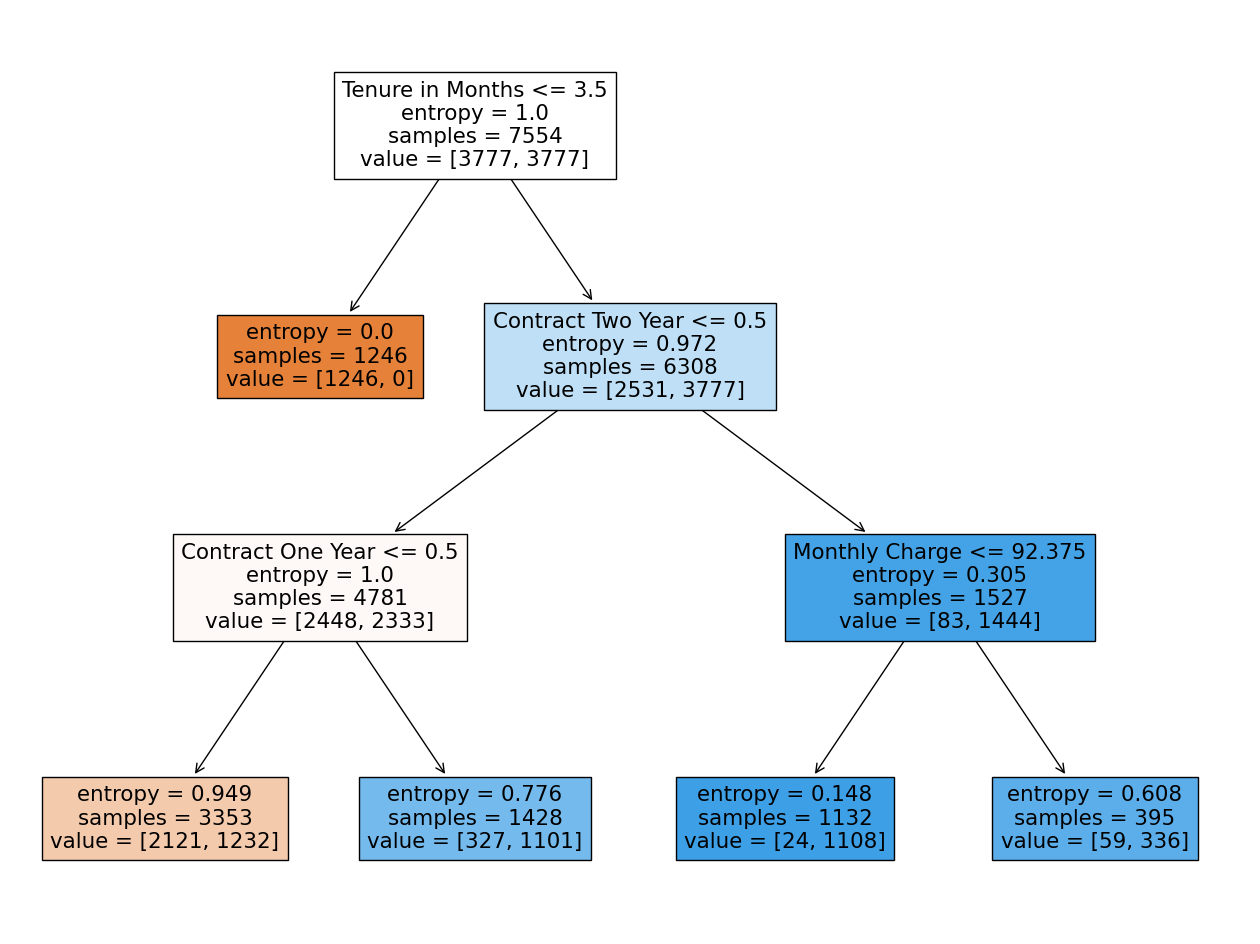

In [ ]:
#visualize the tree
fig = plt.figure(figsize=(16,12))
_ = plot_tree(model,
              feature_names=X_train_resampled.columns,
              filled=True)

## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

GaussianNB model calculates probabilities based on the mean and variance of the features for each class, and scaling doesn't change the underlying Gaussian distribution that the model assumes => scaling data has no impact on the model's performance. But if the training data is imbalanced, the model may be biased towards the majority class.

**With unbalanced data**

In [ ]:
model = GaussianNB()
model.fit(X_train,Y_train.values.ravel()) #use ravel() to get rid of the warnings
Y_pred = model.predict(X_test)

#evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.7116843702579666
0.7406914103923647
-0.4163025804171083
[[303  72]
 [308 635]]
              precision    recall  f1-score   support

           0       0.50      0.81      0.61       375
           1       0.90      0.67      0.77       943

    accuracy                           0.71      1318
   macro avg       0.70      0.74      0.69      1318
weighted avg       0.78      0.71      0.73      1318



**With over sampling data**

In [ ]:
model = GaussianNB()
model.fit(X_train_resampled,Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
Y_pred = model.predict(X_test)

#evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.6957511380880121
0.7399971721456344
-0.49457193354542217
[[316  59]
 [342 601]]
              precision    recall  f1-score   support

           0       0.48      0.84      0.61       375
           1       0.91      0.64      0.75       943

    accuracy                           0.70      1318
   macro avg       0.70      0.74      0.68      1318
weighted avg       0.79      0.70      0.71      1318



**With under sampling data**

In [ ]:
model = GaussianNB()
model.fit(X_train_under_resampled,Y_train_under_resampled.values.ravel()) #use ravel() to get rid of the warnings
Y_pred = model.predict(X_test)

#evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.6942336874051593
0.7373305054789678
-0.5020261576528808
[[314  61]
 [342 601]]
              precision    recall  f1-score   support

           0       0.48      0.84      0.61       375
           1       0.91      0.64      0.75       943

    accuracy                           0.69      1318
   macro avg       0.69      0.74      0.68      1318
weighted avg       0.79      0.69      0.71      1318



The model has the best performance is **With over sampling data**

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**With unscaled and unbalanced data**

In [ ]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,21)
criterions = ["gini", "entropy", "log_loss"]
results =[]

for i in max_depths:
  for k in criterions:
    model = RandomForestClassifier(max_depth=i, criterion=k, random_state=100)
    model.fit(X_train, Y_train.values.ravel()) #use ravel() to get rid of the warnings
    Y_pred = model.predict(X_test)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Churned': report['0']['precision'],
                    'Recall of Churned': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
58   i=20, k=entropy        0.883156                0.829200   
59  i=20, k=log_loss        0.883156                0.829200   
49   i=17, k=entropy        0.880121                0.824670   
50  i=17, k=log_loss        0.880121                0.824670   
55   i=19, k=entropy        0.879363                0.824140   
56  i=19, k=log_loss        0.879363                0.824140   
54      i=19, k=gini        0.881639                0.824928   
51      i=18, k=gini        0.876328                0.821216   
48      i=17, k=gini        0.879363                0.822534   
43   i=15, k=entropy        0.877086                0.820943   
44  i=15, k=log_loss        0.877086                0.820943   
40   i=14, k=entropy        0.876328                0.820413   
41  i=14, k=log_loss        0.876328                0.820413   
57      i=20, k=gini        0.877845                0.820670   
42      i=15, k=gini        0.880880                0.821988   
45      i=16, k=gini        0.877845                0.819867   
34   i=12, k=entropy        0.880121                0.820655   
35  i=12, k=log_loss        0.880121                0.820655   
37   i=13, k=entropy        0.880121                0.820655   
38  i=13, k=log_loss        0.880121                0.820655   
52   i=18, k=entropy        0.879363                0.820124   
53  i=18, k=log_loss        0.879363                0.820124   
36      i=13, k=gini        0.882398                0.821442   
33      i=12, k=gini        0.880121                0.818245   
39      i=14, k=gini        0.878604                0.817185   
46   i=16, k=entropy        0.873293                0.813473   
47  i=16, k=log_loss        0.873293                0.813473   
31   i=11, k=entropy        0.876328                0.812382   
32  i=11, k=log_loss        0.876328                0.812382   
30      i=11, k=gini        0.878604                0.813169   
28   i=10, k=entropy        0.879363                0.812896   
29  i=10, k=log_loss        0.879363                0.812896   
27      i=10, k=gini        0.874810                0.806503   
25    i=9, k=entropy        0.875569                0.805427   
26   i=9, k=log_loss        0.875569                0.805427   
24       i=9, k=gini        0.873293                0.803033   
22    i=8, k=entropy        0.872534                0.796078   
23   i=8, k=log_loss        0.872534                0.796078   
21       i=8, k=gini        0.868741                0.788608   
18       i=7, k=gini        0.864947                0.778729   
19    i=7, k=entropy        0.863429                0.777668   
20   i=7, k=log_loss        0.863429                0.777668   
15       i=6, k=gini        0.848255                0.748592   
16    i=6, k=entropy        0.844461                0.741926   
17   i=6, k=log_loss        0.844461                0.741926   
12       i=5, k=gini        0.831563                0.710425   
13    i=5, k=entropy        0.834598                0.711743   
14   i=5, k=log_loss        0.834598                0.711743   
9        i=4, k=gini        0.814871                0.675470   
10    i=4, k=entropy        0.808801                0.664803   
11   i=4, k=log_loss        0.808801                0.664803   
3        i=2, k=gini        0.802731                0.653333   
6        i=3, k=gini        0.801973                0.652000   
4     i=2, k=entropy        0.801214                0.650667   
5    i=2, k=log_loss        0.801214                0.650667   
7     i=3, k=entropy        0.801214                0.650667   
8    i=3, k=log_loss        0.801214                0.650667   
0        i=1, k=gini        0.792109                0.634667   
1     i=1, k=entropy        0.783005                0.618667   
2    i=1, k=log_loss        0.783005                0.618667   

    Precision of Churned  Recall of Churned        F1  
58              0.859935           0.704000  0.7

**With scaled and unbalanced data**

In [ ]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,21)
criterions = ["gini", "entropy", "log_loss"]
results =[]

for i in max_depths:
  for k in criterions:
    model = RandomForestClassifier(max_depth=i, criterion=k, random_state=100)
    model.fit(X_train_scaled, Y_train.values.ravel()) #use ravel() to get rid of the warnings
    Y_pred = model.predict(X_test_scaled)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Churned': report['0']['precision'],
                    'Recall of Churned': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
58   i=20, k=entropy        0.882398                0.828670   
59  i=20, k=log_loss        0.882398                0.828670   
55   i=19, k=entropy        0.880121                0.824670   
56  i=19, k=log_loss        0.880121                0.824670   
54      i=19, k=gini        0.881639                0.824928   
49   i=17, k=entropy        0.879363                0.823337   
50  i=17, k=log_loss        0.879363                0.823337   
51      i=18, k=gini        0.876328                0.821216   
43   i=15, k=entropy        0.877086                0.820943   
44  i=15, k=log_loss        0.877086                0.820943   
40   i=14, k=entropy        0.876328                0.820413   
41  i=14, k=log_loss        0.876328                0.820413   
57      i=20, k=gini        0.877845                0.820670   
42      i=15, k=gini        0.880121                0.821458   
48      i=17, k=gini        0.877086                0.819337   
37   i=13, k=entropy        0.880121                0.820655   
38  i=13, k=log_loss        0.880121                0.820655   
52   i=18, k=entropy        0.879363                0.820124   
53  i=18, k=log_loss        0.879363                0.820124   
45      i=16, k=gini        0.877086                0.818534   
36      i=13, k=gini        0.880880                0.820382   
34   i=12, k=entropy        0.879363                0.819321   
35  i=12, k=log_loss        0.879363                0.819321   
33      i=12, k=gini        0.880121                0.818245   
39      i=14, k=gini        0.878604                0.817185   
46   i=16, k=entropy        0.874052                0.814004   
47  i=16, k=log_loss        0.874052                0.814004   
31   i=11, k=entropy        0.876328                0.812382   
32  i=11, k=log_loss        0.876328                0.812382   
30      i=11, k=gini        0.878604                0.813169   
28   i=10, k=entropy        0.879363                0.812896   
29  i=10, k=log_loss        0.879363                0.812896   
27      i=10, k=gini        0.874810                0.806503   
25    i=9, k=entropy        0.875569                0.805427   
26   i=9, k=log_loss        0.875569                0.805427   
24       i=9, k=gini        0.873293                0.803033   
22    i=8, k=entropy        0.872534                0.796078   
23   i=8, k=log_loss        0.872534                0.796078   
21       i=8, k=gini        0.868741                0.788608   
18       i=7, k=gini        0.864947                0.778729   
19    i=7, k=entropy        0.863429                0.777668   
20   i=7, k=log_loss        0.863429                0.777668   
15       i=6, k=gini        0.848255                0.748592   
16    i=6, k=entropy        0.844461                0.741926   
17   i=6, k=log_loss        0.844461                0.741926   
12       i=5, k=gini        0.831563                0.710425   
13    i=5, k=entropy        0.834598                0.711743   
14   i=5, k=log_loss        0.834598                0.711743   
9        i=4, k=gini        0.814871                0.675470   
10    i=4, k=entropy        0.808801                0.664803   
11   i=4, k=log_loss        0.808801                0.664803   
3        i=2, k=gini        0.802731                0.653333   
6        i=3, k=gini        0.801973                0.652000   
4     i=2, k=entropy        0.801214                0.650667   
5    i=2, k=log_loss        0.801214                0.650667   
7     i=3, k=entropy        0.801214                0.650667   
8    i=3, k=log_loss        0.801214                0.650667   
0        i=1, k=gini        0.792109                0.634667   
1     i=1, k=entropy        0.783005                0.618667   
2    i=1, k=log_loss        0.783005                0.618667   

    Precision of Churned  Recall of Churned        F1  
58              0.857143           0.704000  0.7

**With unscaled and balanced data**

In [ ]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,21)
criterions = ["gini", "entropy", "log_loss"]
results =[]

for i in max_depths:
  for k in criterions:
    model = RandomForestClassifier(max_depth=i, criterion=k, random_state=100)
    model.fit(X_train_resampled, Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
    Y_pred = model.predict(X_test)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Churned': report['0']['precision'],
                    'Recall of Churned': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
22    i=8, k=entropy        0.843703                0.846603   
23   i=8, k=log_loss        0.843703                0.846603   
19    i=7, k=entropy        0.831563                0.836513   
20   i=7, k=log_loss        0.831563                0.836513   
16    i=6, k=entropy        0.830046                0.834650   
17   i=6, k=log_loss        0.830046                0.834650   
25    i=9, k=entropy        0.856601                0.850798   
26   i=9, k=log_loss        0.856601                0.850798   
15       i=6, k=gini        0.833080                0.834361   
13    i=5, k=entropy        0.827011                0.830119   
14   i=5, k=log_loss        0.827011                0.830119   
21       i=8, k=gini        0.847496                0.842829   
12       i=5, k=gini        0.819423                0.823211   
18       i=7, k=gini        0.842185                0.838315   
28   i=10, k=entropy        0.855083                0.845722   
29  i=10, k=log_loss        0.855083                0.845722   
24       i=9, k=gini        0.849772                0.841207   
31   i=11, k=entropy        0.851290                0.841465   
32  i=11, k=log_loss        0.851290                0.841465   
7     i=3, k=entropy        0.812595                0.813620   
8    i=3, k=log_loss        0.812595                0.813620   
4     i=2, k=entropy        0.801973                0.805394   
5    i=2, k=log_loss        0.801973                0.805394   
34   i=12, k=entropy        0.858877                0.844358   
35  i=12, k=log_loss        0.858877                0.844358   
27      i=10, k=gini        0.854325                0.841176   
10    i=4, k=entropy        0.822458                0.818907   
11   i=4, k=log_loss        0.822458                0.818907   
9        i=4, k=gini        0.822458                0.817301   
33      i=12, k=gini        0.864947                0.844584   
37   i=13, k=entropy        0.858877                0.840342   
38  i=13, k=log_loss        0.858877                0.840342   
6        i=3, k=gini        0.814112                0.809059   
40   i=14, k=entropy        0.863429                0.841917   
41  i=14, k=log_loss        0.863429                0.841917   
30      i=11, k=gini        0.855083                0.836085   
43   i=15, k=entropy        0.865706                0.842705   
44  i=15, k=log_loss        0.865706                0.842705   
36      i=13, k=gini        0.863429                0.840311   
39      i=14, k=gini        0.860395                0.835781   
46   i=16, k=entropy        0.864947                0.838159   
47  i=16, k=log_loss        0.864947                0.838159   
3        i=2, k=gini        0.799697                0.792560   
45      i=16, k=gini        0.867223                0.835734   
49   i=17, k=entropy        0.864188                0.833613   
50  i=17, k=log_loss        0.864188                0.833613   
55   i=19, k=entropy        0.870258                0.837052   
56  i=19, k=log_loss        0.870258                0.837052   
51      i=18, k=gini        0.870258                0.836249   
52   i=18, k=entropy        0.864947                0.832537   
53  i=18, k=log_loss        0.864947                0.832537   
48      i=17, k=gini        0.864947                0.830931   
57      i=20, k=gini        0.874052                0.836491   
54      i=19, k=gini        0.871775                0.834900   
58   i=20, k=entropy        0.867982                0.832249   
59  i=20, k=log_loss        0.867982                0.832249   
42      i=15, k=gini        0.862671                0.828537   
0        i=1, k=gini        0.764036                0.717847   
1     i=1, k=entropy        0.790592                0.730783   
2    i=1, k=log_loss        0.790592                0.730783   

    Precision of Churned  Recall of Churned        F1  
22              0.679406           0.853333  0.7

**With scaled and balanced data**

In [ ]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,21)
criterions = ["gini", "entropy", "log_loss"]
results =[]

for i in max_depths:
  for k in criterions:
    model = RandomForestClassifier(max_depth=i, criterion=k, random_state=100)
    model.fit(X_train_scaled_resampled, Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
    Y_pred = model.predict(X_test_scaled)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y_test, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y_test, Y_pred),
                    'Precision of Churned': report['0']['precision'],
                    'Recall of Churned': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
22    i=8, k=entropy        0.843703                0.846603   
23   i=8, k=log_loss        0.843703                0.846603   
19    i=7, k=entropy        0.831563                0.836513   
20   i=7, k=log_loss        0.831563                0.836513   
16    i=6, k=entropy        0.830046                0.834650   
17   i=6, k=log_loss        0.830046                0.834650   
25    i=9, k=entropy        0.857360                0.852131   
26   i=9, k=log_loss        0.857360                0.852131   
15       i=6, k=gini        0.833080                0.834361   
13    i=5, k=entropy        0.827011                0.830119   
14   i=5, k=log_loss        0.827011                0.830119   
21       i=8, k=gini        0.848255                0.844163   
12       i=5, k=gini        0.819423                0.823211   
18       i=7, k=gini        0.842185                0.838315   
28   i=10, k=entropy        0.855083                0.845722   
29  i=10, k=log_loss        0.855083                0.845722   
24       i=9, k=gini        0.849772                0.841207   
31   i=11, k=entropy        0.851290                0.841465   
32  i=11, k=log_loss        0.851290                0.841465   
7     i=3, k=entropy        0.812595                0.813620   
8    i=3, k=log_loss        0.812595                0.813620   
4     i=2, k=entropy        0.801973                0.805394   
5    i=2, k=log_loss        0.801973                0.805394   
34   i=12, k=entropy        0.858877                0.844358   
35  i=12, k=log_loss        0.858877                0.844358   
27      i=10, k=gini        0.854325                0.841176   
10    i=4, k=entropy        0.822458                0.818907   
11   i=4, k=log_loss        0.822458                0.818907   
9        i=4, k=gini        0.822458                0.817301   
37   i=13, k=entropy        0.859636                0.840872   
38  i=13, k=log_loss        0.859636                0.840872   
6        i=3, k=gini        0.814112                0.809059   
33      i=12, k=gini        0.864188                0.843251   
40   i=14, k=entropy        0.863429                0.841917   
41  i=14, k=log_loss        0.863429                0.841917   
30      i=11, k=gini        0.855083                0.836085   
43   i=15, k=entropy        0.864947                0.841372   
44  i=15, k=log_loss        0.864947                0.841372   
36      i=13, k=gini        0.863429                0.840311   
46   i=16, k=entropy        0.864947                0.838962   
47  i=16, k=log_loss        0.864947                0.838962   
39      i=14, k=gini        0.860395                0.835781   
3        i=2, k=gini        0.799697                0.792560   
45      i=16, k=gini        0.867223                0.836537   
49   i=17, k=entropy        0.864188                0.833613   
50  i=17, k=log_loss        0.864188                0.833613   
55   i=19, k=entropy        0.871017                0.837582   
56  i=19, k=log_loss        0.871017                0.837582   
52   i=18, k=entropy        0.865706                0.833068   
53  i=18, k=log_loss        0.865706                0.833068   
51      i=18, k=gini        0.869499                0.834916   
58   i=20, k=entropy        0.868741                0.833582   
59  i=20, k=log_loss        0.868741                0.833582   
48      i=17, k=gini        0.864188                0.830401   
57      i=20, k=gini        0.874810                0.837021   
54      i=19, k=gini        0.871775                0.834900   
42      i=15, k=gini        0.862671                0.828537   
0        i=1, k=gini        0.764036                0.717847   
1     i=1, k=entropy        0.790592                0.730783   
2    i=1, k=log_loss        0.790592                0.730783   

    Precision of Churned  Recall of Churned        F1  
22              0.679406           0.853333  0.7

The model have the best performance is **With unscaled and balanced data** with the hyperparameter combination is **max_depth=8, citerion=entropy**

In [ ]:
#create empty instance and fit to train dataset and use to predict the test dataset
model = RandomForestClassifier(max_depth=8, criterion='entropy', random_state=100)
model.fit(X_train_resampled,  Y_train_resampled.values.ravel()) #use ravel() to get rid of the warnings
Y_pred = model.predict(X_test)

#evaluate the model
print(accuracy_score(Y_test, Y_pred))
print(balanced_accuracy_score(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.8437025796661608
0.846603039943443
0.2322149169317781
[[320  55]
 [151 792]]
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       375
           1       0.94      0.84      0.88       943

    accuracy                           0.84      1318
   macro avg       0.81      0.85      0.82      1318
weighted avg       0.86      0.84      0.85      1318



#Compare all models with Cross validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import make_pipeline
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

## Cross validation without Feature selection

**Logistic Regression**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=100))
Y_pred = cross_val_predict(pipeline,
                           X,
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.8505084231294582
0.812437653598861
[[1354  515]
 [ 470 4250]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1869
           1       0.89      0.90      0.90      4720

    accuracy                           0.85      6589
   macro avg       0.82      0.81      0.81      6589
weighted avg       0.85      0.85      0.85      6589



**K Nearest Neighbors**

In [ ]:
#Try different hyperparameters by Grid Search Approach
n_neighbors = np.arange(1,11)
metrics = ["minkowski","manhattan","euclidean","canberra"]
weights = ["uniform","distance"]
results = []

for n in n_neighbors:
  for m in metrics:
    for w in weights:
      pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=n, metric=m, weights=w))
      Y_pred = cross_val_predict(pipeline,
                                 X,
                                 Y.values.ravel(),
                                 cv=KFold(n_splits=5,random_state=100,shuffle=True))
      report = classification_report(Y, Y_pred, output_dict=True)
      results.append({'Combination': f'n={n}, m={m}, w={w}',
                      'accuracy_score': accuracy_score(Y, Y_pred),
                      'balance_accuracy_score': balanced_accuracy_score(Y, Y_pred),
                      'Precision of Churned': report['0']['precision'],
                      'Recall of Churned': report['0']['recall'],
                      'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
14    n=2, m=canberra, w=uniform        0.760206                0.779625   
10   n=2, m=manhattan, w=uniform        0.752163                0.765931   
30    n=4, m=canberra, w=uniform        0.803612                0.796995   
8    n=2, m=minkowski, w=uniform        0.752163                0.758175   
12   n=2, m=euclidean, w=uniform        0.752163                0.758175   
..                           ...             ...                     ...   
1   n=1, m=minkowski, w=distance        0.781302                0.734400   
4    n=1, m=euclidean, w=uniform        0.781302                0.734400   
5   n=1, m=euclidean, w=distance        0.781302                0.734400   
9   n=2, m=minkowski, w=distance        0.781302                0.734400   
13  n=2, m=euclidean, w=distance        0.781302                0.734400   

    Precision of Churned  Recall of Churned        F1  
14              0.551736           0.824505  0.661090  
10              0.542972           0.797753  0.646154  
30              0.622497           0.781701  0.693074  
8               0.544528           0.772071  0.638637  
12              0.544528           0.772071  0.638637  
..                   ...                ...       ...  
1               0.611925           0.626003  0.618884  
4               0.611925           0.626003  0.618884  
5               0.611925           0.626003  0.618884  
9               0.611925           0.626003  0.618884  
13              0.611925           0.626003  0.618884  

[80 rows x 6 columns]

**Decision Tree**

In [ ]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,21)
criterions = ["gini", "entropy", "log_loss"]
results = []

for i in max_depths:
  for k in criterions:
    pipeline = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=i, criterion=k, random_state=100))
    Y_pred = cross_val_predict(pipeline,
                                X,
                                Y.values.ravel(),
                                cv=KFold(n_splits=5,random_state=100,shuffle=True))
    report = classification_report(Y, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y, Y_pred),
                    'Precision of Churned': report['0']['precision'],
                    'Recall of Churned': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
15       i=6, k=gini        0.851571                0.821420   
16    i=6, k=entropy        0.850964                0.820997   
17   i=6, k=log_loss        0.850964                0.820997   
37   i=13, k=entropy        0.841251                0.803229   
38  i=13, k=log_loss        0.841251                0.803229   
40   i=14, k=entropy        0.833966                0.797174   
41  i=14, k=log_loss        0.833966                0.797174   
43   i=15, k=entropy        0.831537                0.794025   
44  i=15, k=log_loss        0.831537                0.794025   
52   i=18, k=entropy        0.826984                0.790847   
53  i=18, k=log_loss        0.826984                0.790847   
46   i=16, k=entropy        0.828806                0.791957   
47  i=16, k=log_loss        0.828806                0.791957   
33      i=12, k=gini        0.839885                0.798397   
58   i=20, k=entropy        0.825011                0.787693   
59  i=20, k=log_loss        0.825011                0.787693   
55   i=19, k=entropy        0.826681                0.788696   
56  i=19, k=log_loss        0.826681                0.788696   
42      i=15, k=gini        0.830475                0.790537   
48      i=17, k=gini        0.826833                0.787671   
34   i=12, k=entropy        0.845804                0.800589   
35  i=12, k=log_loss        0.845804                0.800589   
36      i=13, k=gini        0.837608                0.794223   
39      i=14, k=gini        0.830323                0.789138   
49   i=17, k=entropy        0.830323                0.789138   
50  i=17, k=log_loss        0.830323                0.789138   
54      i=19, k=gini        0.822128                0.783418   
31   i=11, k=entropy        0.848384                0.801582   
32  i=11, k=log_loss        0.848384                0.801582   
57      i=20, k=gini        0.820003                0.781450   
51      i=18, k=gini        0.821369                0.781757   
45      i=16, k=gini        0.826074                0.784233   
28   i=10, k=entropy        0.851723                0.800843   
29  i=10, k=log_loss        0.851723                0.800843   
30      i=11, k=gini        0.840947                0.792998   
21       i=8, k=gini        0.856579                0.803101   
25    i=9, k=entropy        0.856276                0.802889   
26   i=9, k=log_loss        0.856276                0.802889   
27      i=10, k=gini        0.852937                0.799589   
24       i=9, k=gini        0.855972                0.798153   
22    i=8, k=entropy        0.852026                0.793945   
23   i=8, k=log_loss        0.852026                0.793945   
19    i=7, k=entropy        0.855669                0.785499   
20   i=7, k=log_loss        0.855669                0.785499   
18       i=7, k=gini        0.854151                0.783793   
10    i=4, k=entropy        0.828957                0.757321   
11   i=4, k=log_loss        0.828957                0.757321   
13    i=5, k=entropy        0.840643                0.763377   
14   i=5, k=log_loss        0.840643                0.763377   
9        i=4, k=gini        0.840947                0.734664   
12       i=5, k=gini        0.842616                0.733567   
0        i=1, k=gini        0.806951                0.659711   
1     i=1, k=entropy        0.806951                0.659711   
2    i=1, k=log_loss        0.806951                0.659711   
3        i=2, k=gini        0.806951                0.659711   
4     i=2, k=entropy        0.806951                0.659711   
5    i=2, k=log_loss        0.806951                0.659711   
6        i=3, k=gini        0.806951                0.659711   
7     i=3, k=entropy        0.806951                0.659711   
8    i=3, k=log_loss        0.806951                0.659711   

    Precision of Churned  Recall of Churned        F1  
15              0.732152           0.751739  0.7

**Gaussian Naive Bayes**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), GaussianNB())
Y_pred = cross_val_predict(pipeline,
                           X,
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.7949612991349219
0.7983898191727653
[[1507  362]
 [ 989 3731]]
              precision    recall  f1-score   support

           0       0.60      0.81      0.69      1869
           1       0.91      0.79      0.85      4720

    accuracy                           0.79      6589
   macro avg       0.76      0.80      0.77      6589
weighted avg       0.82      0.79      0.80      6589



**Random Forest**

In [ ]:
#Try different hyperparameters by Grid Search Approach
max_depths = np.arange(1,21)
criterions = ["gini", "entropy", "log_loss"]
results = []

for i in max_depths:
  for k in criterions:
    pipeline = make_pipeline(MinMaxScaler(), RandomForestClassifier(max_depth=i, criterion=k, random_state=100))
    Y_pred = cross_val_predict(pipeline,
                                X,
                                Y.values.ravel(),
                                cv=KFold(n_splits=5,random_state=100,shuffle=True))
    report = classification_report(Y, Y_pred, output_dict=True)
    results.append({'Combination': f'i={i}, k={k}',
                    'accuracy_score': accuracy_score(Y, Y_pred),
                    'balance_accuracy_score': balanced_accuracy_score(Y, Y_pred),
                    'Precision of Churned': report['0']['precision'],
                    'Recall of Churned': report['0']['recall'],
                    'F1': report['0']['f1-score']})

results_df = pd.DataFrame(results)

In [ ]:
results_df.sort_values(by=["Recall of Churned","Precision of Churned","balance_accuracy_score"],ascending=[False,False,False])

Combination  accuracy_score  balance_accuracy_score  \
58   i=20, k=entropy        0.874488                0.818995   
59  i=20, k=log_loss        0.874488                0.818995   
52   i=18, k=entropy        0.871301                0.815801   
53  i=18, k=log_loss        0.871301                0.815801   
51      i=18, k=gini        0.872211                0.816113   
55   i=19, k=entropy        0.870390                0.814519   
56  i=19, k=log_loss        0.870390                0.814519   
57      i=20, k=gini        0.870997                0.814781   
46   i=16, k=entropy        0.870997                0.814619   
47  i=16, k=log_loss        0.870997                0.814619   
54      i=19, k=gini        0.870845                0.814029   
49   i=17, k=entropy        0.871149                0.814079   
50  i=17, k=log_loss        0.871149                0.814079   
40   i=14, k=entropy        0.871604                0.814235   
41  i=14, k=log_loss        0.871604                0.814235   
43   i=15, k=entropy        0.871908                0.814285   
44  i=15, k=log_loss        0.871908                0.814285   
42      i=15, k=gini        0.870845                0.813382   
48      i=17, k=gini        0.870238                0.812797   
36      i=13, k=gini        0.870390                0.812256   
34   i=12, k=entropy        0.872059                0.813260   
35  i=12, k=log_loss        0.872059                0.813260   
39      i=14, k=gini        0.869935                0.811777   
37   i=13, k=entropy        0.870694                0.811983   
38  i=13, k=log_loss        0.870694                0.811983   
45      i=16, k=gini        0.869176                0.810924   
33      i=12, k=gini        0.870997                0.810256   
30      i=11, k=gini        0.869783                0.808601   
31   i=11, k=entropy        0.869783                0.807954   
32  i=11, k=log_loss        0.869783                0.807954   
28   i=10, k=entropy        0.870542                0.807515   
29  i=10, k=log_loss        0.870542                0.807515   
27      i=10, k=gini        0.868872                0.804087   
24       i=9, k=gini        0.868569                0.801936   
25    i=9, k=entropy        0.869024                0.801769   
26   i=9, k=log_loss        0.869024                0.801769   
21       i=8, k=gini        0.867203                0.795650   
22    i=8, k=entropy        0.866292                0.793237   
23   i=8, k=log_loss        0.866292                0.793237   
18       i=7, k=gini        0.860222                0.780436   
19    i=7, k=entropy        0.861284                0.780692   
20   i=7, k=log_loss        0.861284                0.780692   
15       i=6, k=gini        0.849143                0.755412   
16    i=6, k=entropy        0.849750                0.753735   
17   i=6, k=log_loss        0.849750                0.753735   
12       i=5, k=gini        0.837153                0.725067   
13    i=5, k=entropy        0.832296                0.713113   
14   i=5, k=log_loss        0.832296                0.713113   
9        i=4, k=gini        0.814691                0.677879   
10    i=4, k=entropy        0.811200                0.668979   
11   i=4, k=log_loss        0.811200                0.668979   
6        i=3, k=gini        0.807255                0.660569   
3        i=2, k=gini        0.806951                0.660196   
7     i=3, k=entropy        0.807103                0.660140   
8    i=3, k=log_loss        0.807103                0.660140   
4     i=2, k=entropy        0.806799                0.659767   
5    i=2, k=log_loss        0.806799                0.659767   
0        i=1, k=gini        0.795872                0.640182   
1     i=1, k=entropy        0.788739                0.627608   
2    i=1, k=log_loss        0.788739                0.627608   

    Precision of Churned  Recall of Churned        F1  
58              0.838312           0.690744  0.7

## Feature selection

**Logistics Regression**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=100))

sfs = SFS(pipeline,
           k_features=len(X.columns),
           forward=True,
           floating=False,
           verbose=1,
           scoring="balanced_accuracy",
           cv=KFold(n_splits=5,random_state=100,shuffle=True))

sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

sfs.subsets_

Features: 25/25

{1: {'feature_idx': (4,),
  'cv_scores': array([0.6805684 , 0.70424417, 0.70570059, 0.7048332 , 0.69753234]),
  'avg_score': 0.6985757384132075,
  'feature_names': ('4',)},
 2: {'feature_idx': (4, 8),
  'cv_scores': array([0.71255285, 0.72936318, 0.74372021, 0.71342795, 0.72809276]),
  'avg_score': 0.7254313890726161,
  'feature_names': ('4', '8')},
 3: {'feature_idx': (4, 8, 21),
  'cv_scores': array([0.73311417, 0.74981818, 0.76175313, 0.73284872, 0.75088478]),
  'avg_score': 0.7456837966250515,
  'feature_names': ('4', '8', '21')},
 4: {'feature_idx': (4, 8, 20, 21),
  'cv_scores': array([0.77402616, 0.7854691 , 0.78524831, 0.7698138 , 0.78082586]),
  'avg_score': 0.7790766444989755,
  'feature_names': ('4', '8', '20', '21')},
 5: {'feature_idx': (3, 4, 8, 20, 21),
  'cv_scores': array([0.78952704, 0.79106427, 0.80672043, 0.78705955, 0.79053636]),
  'avg_score': 0.7929815292537421,
  'feature_names': ('3', '4', '8', '20', '21')},
 6: {'feature_idx': (1, 3, 4, 8, 20, 21),
  'cv_score

In [ ]:
#Feature selection: 12: {'feature_idx': (0, 1, 2, 3, 4, 8, 9, 10, 12, 13, 20, 21)
X.columns[[0, 1, 2, 3, 4, 8, 9, 10, 12, 13, 20, 21]]

Index(['Age', 'Married', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Revenue', 'Population',
       'Contract One Year', 'Contract Two Year'],
      dtype='object')

**K Nearest Neighbors**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=2, metric="canberra",weights="uniform"))

sfs = SFS(pipeline,
           k_features=len(X.columns),
           forward=True,
           floating=False,
           verbose=1,
           scoring='balanced_accuracy',
           cv=KFold(n_splits=5,random_state=100,shuffle=True))

sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

sfs.subsets_

Features: 25/25

{1: {'feature_idx': (4,),
  'cv_scores': array([0.65590385, 0.62231675, 0.63966855, 0.61737701, 0.61605705]),
  'avg_score': 0.6302646413684976,
  'feature_names': ('4',)},
 2: {'feature_idx': (4, 7),
  'cv_scores': array([0.71577943, 0.71626096, 0.72641614, 0.72345925, 0.7144317 ]),
  'avg_score': 0.7192694965736658,
  'feature_names': ('4', '7')},
 3: {'feature_idx': (3, 4, 7),
  'cv_scores': array([0.75509367, 0.77745515, 0.75037967, 0.76027   , 0.76596149]),
  'avg_score': 0.7618319976765442,
  'feature_names': ('3', '4', '7')},
 4: {'feature_idx': (3, 4, 7, 21),
  'cv_scores': array([0.77956168, 0.79301197, 0.76650039, 0.77181285, 0.77696378]),
  'avg_score': 0.7775701319961342,
  'feature_names': ('3', '4', '7', '21')},
 5: {'feature_idx': (0, 3, 4, 7, 21),
  'cv_scores': array([0.7920608 , 0.79948318, 0.79508092, 0.77856288, 0.79509299]),
  'avg_score': 0.7920561547630003,
  'feature_names': ('0', '3', '4', '7', '21')},
 6: {'feature_idx': (0, 2, 3, 4, 7, 21),
  'cv_scores': arr

In [ ]:
#Feature selection: 10: {'feature_idx': (0, 2, 3, 4, 7, 16, 17, 18, 20, 21)
X.columns[[0, 2, 3, 4, 7, 16, 17, 18, 20, 21]]

Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Monthly Charge', 'Offer B', 'Offer C', 'Offer D',
       'Contract One Year', 'Contract Two Year'],
      dtype='object')

**Decision Tree**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=6,criterion="gini",random_state=100))

sfs = SFS(pipeline,
           k_features=len(X.columns),
           forward=True,
           floating=False,
           verbose=1,
           scoring='balanced_accuracy',
           cv=KFold(n_splits=5,random_state=100,shuffle=True))

sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

sfs.subsets_

Features: 25/25

{1: {'feature_idx': (4,),
  'cv_scores': array([0.65066667, 0.65816327, 0.66494845, 0.66115702, 0.67432447]),
  'avg_score': 0.6618519756354309,
  'feature_names': ('4',)},
 2: {'feature_idx': (4, 7),
  'cv_scores': array([0.73401909, 0.7498898 , 0.72817038, 0.72734629, 0.72367769]),
  'avg_score': 0.7326206498725105,
  'feature_names': ('4', '7')},
 3: {'feature_idx': (3, 4, 7),
  'cv_scores': array([0.76603464, 0.7520028 , 0.78368529, 0.76863687, 0.76252411]),
  'avg_score': 0.7665767417703171,
  'feature_names': ('3', '4', '7')},
 4: {'feature_idx': (3, 4, 7, 21),
  'cv_scores': array([0.78370308, 0.79702858, 0.79869748, 0.78442444, 0.79607068]),
  'avg_score': 0.7919848528893276,
  'feature_names': ('3', '4', '7', '21')},
 5: {'feature_idx': (3, 4, 7, 20, 21),
  'cv_scores': array([0.80219017, 0.83042601, 0.82649374, 0.82515974, 0.80372848]),
  'avg_score': 0.8175996277854317,
  'feature_names': ('3', '4', '7', '20', '21')},
 6: {'feature_idx': (0, 3, 4, 7, 20, 21),
  'cv_scores': 

In [ ]:
#Feature selection: 7: {'feature_idx': (0, 3, 4, 7, 8, 20, 21)
X.columns[[0, 3, 4, 7, 8, 20, 21]]

Index(['Age', 'Number of Referrals', 'Tenure in Months', 'Monthly Charge',
       'Total Charges', 'Contract One Year', 'Contract Two Year'],
      dtype='object')

**Gaussian Naive Bayes**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), GaussianNB())

sfs = SFS(pipeline,
           k_features=len(X.columns),
           forward=True,
           floating=False,
           verbose=1,
           scoring='balanced_accuracy',
           cv=KFold(n_splits=5,random_state=100,shuffle=True))

sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

sfs.subsets_

Features: 25/25

{1: {'feature_idx': (4,),
  'cv_scores': array([0.68604171, 0.71684224, 0.71051436, 0.69628748, 0.7089372 ]),
  'avg_score': 0.7037245981842061,
  'feature_names': ('4',)},
 2: {'feature_idx': (3, 4),
  'cv_scores': array([0.72997808, 0.73302993, 0.74626704, 0.7107813 , 0.73802003]),
  'avg_score': 0.731615278011881,
  'feature_names': ('3', '4')},
 3: {'feature_idx': (3, 4, 20),
  'cv_scores': array([0.76877766, 0.74996419, 0.78688893, 0.74701225, 0.75678187]),
  'avg_score': 0.7618849766114926,
  'feature_names': ('3', '4', '20')},
 4: {'feature_idx': (3, 4, 20, 21),
  'cv_scores': array([0.80098834, 0.7950616 , 0.83212781, 0.80139905, 0.79419494]),
  'avg_score': 0.8047543455644997,
  'feature_names': ('3', '4', '20', '21')},
 5: {'feature_idx': (3, 4, 7, 20, 21),
  'cv_scores': array([0.80285189, 0.79942809, 0.83287884, 0.80624811, 0.79277043]),
  'avg_score': 0.806835471400022,
  'feature_names': ('3', '4', '7', '20', '21')},
 6: {'feature_idx': (3, 4, 7, 20, 21, 22),
  'cv_scores

In [ ]:
#Feature selection: 17: {'feature_idx': (0, 2, 3, 4, 5, 6, 7, 10, 13, 14, 18, 19, 20, 21, 22, 23, 24)
X.columns[[0, 2, 3, 4, 5, 6, 7, 10, 13, 14, 18, 19, 20, 21, 22, 23, 24]]

Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Phone Service', 'Internet Service',
       'Monthly Charge', 'Total Extra Data Charges', 'Population',
       'Gender Male', 'Offer D', 'Offer E', 'Contract One Year',
       'Contract Two Year', 'Paperless Billing', 'Payment Method Credit Card',
       'Payment Method Mailed Check'],
      dtype='object')

**Random Forest**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), RandomForestClassifier(max_depth=20, criterion="entropy",random_state=100))

sfs = SFS(pipeline,
           k_features=len(X.columns),
           forward=True,
           floating=False,
           verbose=1,
           scoring='balanced_accuracy',
           cv=KFold(n_splits=5,random_state=100,shuffle=True))

sfs = sfs.fit(X.to_numpy(), Y.values.ravel())

sfs.subsets_

Features: 25/25

{1: {'feature_idx': (4,),
  'cv_scores': array([0.65066667, 0.65816327, 0.66494845, 0.66115702, 0.66861761]),
  'avg_score': 0.6607106049288427,
  'feature_names': ('4',)},
 2: {'feature_idx': (4, 7),
  'cv_scores': array([0.72325062, 0.71989465, 0.72169383, 0.739655  , 0.71191007]),
  'avg_score': 0.7232808332768264,
  'feature_names': ('4', '7')},
 3: {'feature_idx': (3, 4, 7),
  'cv_scores': array([0.75231106, 0.7667056 , 0.76207738, 0.75166515, 0.74738989]),
  'avg_score': 0.7560298164503862,
  'feature_names': ('3', '4', '7')},
 4: {'feature_idx': (2, 3, 4, 7),
  'cv_scores': array([0.77761329, 0.78220732, 0.76476555, 0.77467007, 0.77367238]),
  'avg_score': 0.7745857224486158,
  'feature_names': ('2', '3', '4', '7')},
 5: {'feature_idx': (0, 2, 3, 4, 7),
  'cv_scores': array([0.79594486, 0.7868245 , 0.7892584 , 0.79420334, 0.78156908]),
  'avg_score': 0.7895600338992199,
  'feature_names': ('0', '2', '3', '4', '7')},
 6: {'feature_idx': (0, 2, 3, 4, 7, 21),
  'cv_scores': array([

In [ ]:
#Feature selection: 14: {'feature_idx': (0, 1, 2, 3, 4, 5, 7, 8, 15, 16, 20, 21, 22, 23)
X.columns[[0, 1, 2, 3, 4, 5, 7, 8, 15, 16, 20, 21, 22, 23]]

Index(['Age', 'Married', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Phone Service', 'Monthly Charge', 'Total Charges',
       'Offer A', 'Offer B', 'Contract One Year', 'Contract Two Year',
       'Paperless Billing', 'Payment Method Credit Card'],
      dtype='object')

## Cross validation with feature selection

**Logistic Regression**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=100))
Y_pred = cross_val_predict(pipeline,
                           X[X.columns[[0, 1, 2, 3, 4, 8, 9, 10, 12, 13, 20, 21]]],
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.8429200182121718
0.8181291998802949
[[1422  447]
 [ 588 4132]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1869
           1       0.90      0.88      0.89      4720

    accuracy                           0.84      6589
   macro avg       0.80      0.82      0.81      6589
weighted avg       0.85      0.84      0.84      6589



**K Nearest Neighbors**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=2, metric="canberra", weights="uniform"))
Y_pred = cross_val_predict(pipeline,
                           X[X.columns[[0, 2, 3, 4, 7, 16, 17, 18, 20, 21]]],
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.814387615723175
0.8190591247925565
[[1551  318]
 [ 905 3815]]
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      1869
           1       0.92      0.81      0.86      4720

    accuracy                           0.81      6589
   macro avg       0.78      0.82      0.79      6589
weighted avg       0.84      0.81      0.82      6589



**Decision Tree**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=6, criterion="gini", random_state=100))
Y_pred = cross_val_predict(pipeline,
                           X[X.columns[[0, 3, 4, 7, 8, 20, 21]]],
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.8538473212930642
0.827856995492922
[[1435  434]
 [ 529 4191]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1869
           1       0.91      0.89      0.90      4720

    accuracy                           0.85      6589
   macro avg       0.82      0.83      0.82      6589
weighted avg       0.86      0.85      0.85      6589



**Gaussian Naive Bayes**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), GaussianNB())
Y_pred = cross_val_predict(pipeline,
                           X[X.columns[[0, 2, 3, 4, 5, 6, 7, 10, 13, 14, 18, 19, 20, 21, 22, 23, 24]]],
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.8086204279860373
0.8137409767753988
[[1543  326]
 [ 935 3785]]
              precision    recall  f1-score   support

           0       0.62      0.83      0.71      1869
           1       0.92      0.80      0.86      4720

    accuracy                           0.81      6589
   macro avg       0.77      0.81      0.78      6589
weighted avg       0.84      0.81      0.82      6589



**Random Forest**

In [ ]:
pipeline = make_pipeline(MinMaxScaler(), RandomForestClassifier(max_depth=20, criterion="entropy", random_state=100))
Y_pred = cross_val_predict(pipeline,
                           X[X.columns[[0, 1, 2, 3, 4, 5, 7, 8, 15, 16, 20, 21, 22, 23]]],
                           Y.values.ravel(),
                           cv=KFold(n_splits=5,random_state=100,shuffle=True))
print(accuracy_score(Y,Y_pred))
print(balanced_accuracy_score(Y,Y_pred))
print(confusion_matrix(Y,Y_pred))
print(classification_report(Y,Y_pred))

0.8755501593565033
0.8265230659012796
[[1333  536]
 [ 284 4436]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1869
           1       0.89      0.94      0.92      4720

    accuracy                           0.88      6589
   macro avg       0.86      0.83      0.84      6589
weighted avg       0.87      0.88      0.87      6589

